# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [252]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [254]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [256]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [258]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [261]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.shape

(25, 7)

In [262]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()
df_seoul_moving.shape

(25, 5)

In [263]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()
df_seoul_business.shape

(25, 8)

In [264]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()
df_seoul_people.shape

(25, 4)

# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [266]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [267]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,...,한식 일반 음식점업,한식 육류요리 전문점,커피전문점,기타주점업,택시운송업,남녀용 겉옷 및 셔츠 도매업,부동산 중개 및 대리업,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,11486,5008,7273,2528,2517,8320,6508,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,...,3388,1459,1660,1349,4980,1433,1990,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,...,2663,1176,1095,1275,2589,94,867,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,...,4584,2274,2530,1709,6922,700,2352,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,...,3689,1628,2049,1672,2027,190,2136,248571,248566,497137


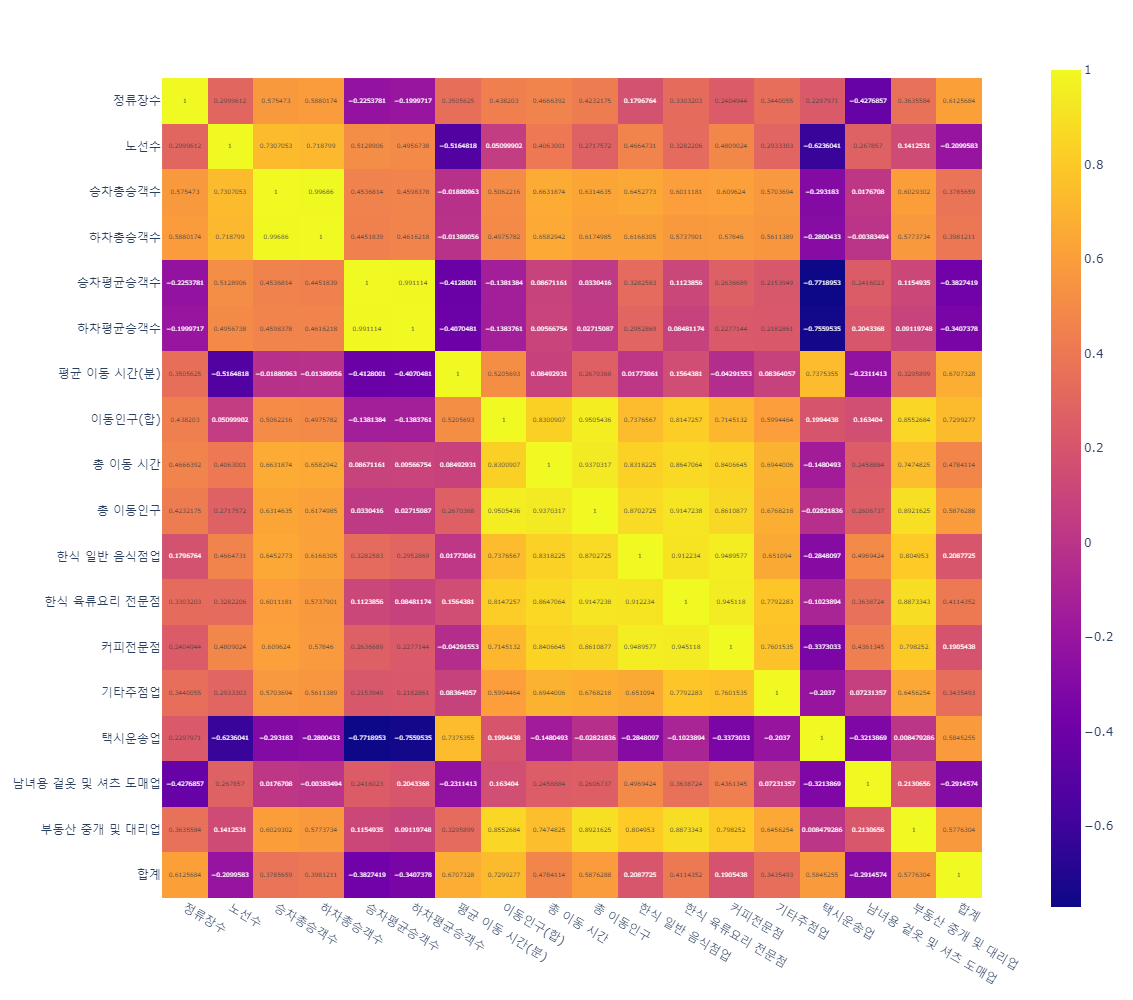

In [268]:
import plotly.express as px
heat = px.imshow(df.set_index('자치구').drop(['남자', '여자'], axis=1).corr(), text_auto=True)
heat.update_layout(height=1000)
heat.show()

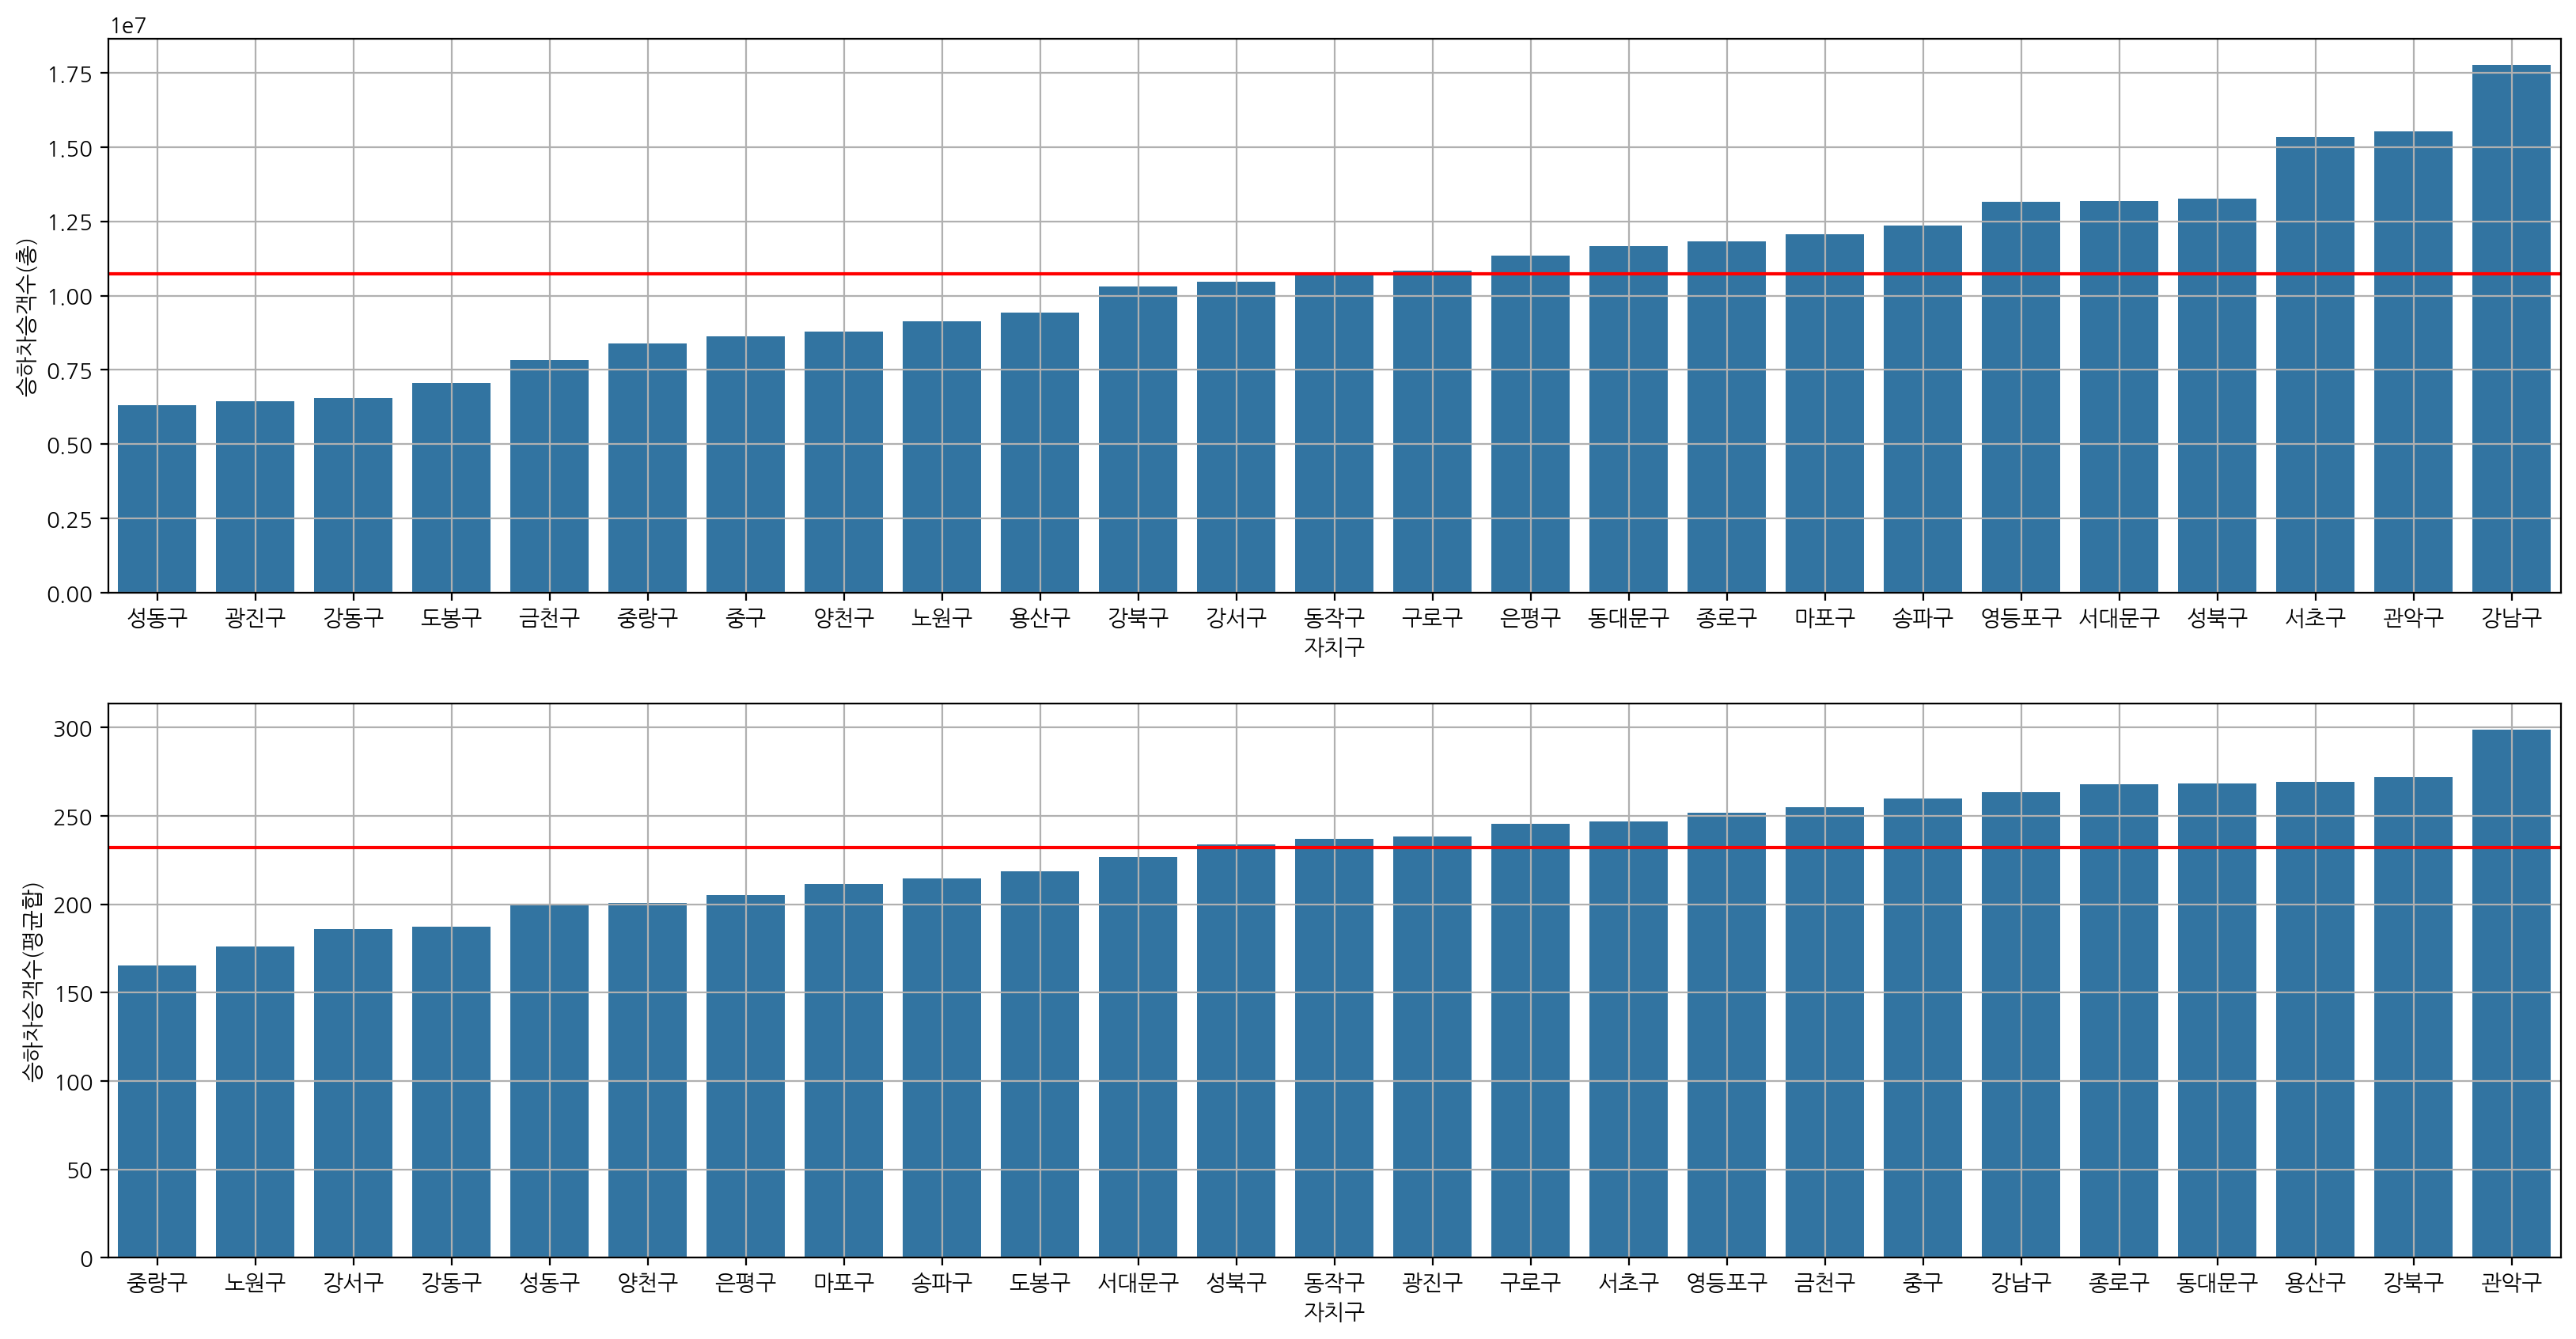

In [269]:
temp = df_seoul_bus_station
temp['승하차승객수(총)'] = df_seoul_bus_station['승차총승객수'] + df_seoul_bus_station['하차총승객수']
temp['승하차승객수(평균합)'] = df_seoul_bus_station['승차평균승객수'] + df_seoul_bus_station['하차평균승객수']
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(x = '자치구', y = '승하차승객수(총)', data = temp.sort_values(by='승하차승객수(총)'))
plt.axhline(temp['승하차승객수(총)'].mean(), color = 'red')
plt.grid()

plt.subplot(2,1,2)
sns.barplot(x = '자치구', y = '승하차승객수(평균합)', data = temp.sort_values(by='승하차승객수(평균합)'))
plt.axhline(temp['승하차승객수(평균합)'].mean(), color = 'red')
plt.grid()

plt.show()


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

### 1) 가설 1: 평균승객수가 높은 곳에 인구수가 많다면 더 많은 대중교통 운영이 필요하다.

### 2) 가설 2: 노선수가 많은 곳에 음식점업이 많은 분포 되어있을 것이다.

### 3) 가설 3: 부동산 중개업이 많은 지역이 정류장이나 노선이 많다(해당 지역의 접근성이 좋기 때문)

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

### 1)

In [276]:
df_seoul_raw = pd.read_csv(path+'seoul_moving_preprocessed.csv')
ss = df_seoul_raw.groupby(['도착시간', '도착 자치구']).count().reset_index().pivot(index='도착 자치구', columns='도착시간', values='요일').reset_index().rename(columns={'도착 자치구':'자치구', '요일':'1달총도착수'})
ss['전체버스운영'] = ss.iloc[:, 1:].sum(axis=1)
 
df_merged = pd.merge(ss[['자치구', '전체버스운영']], 
                     df[['자치구', '승차평균승객수', '승차총승객수','합계']], 
                     on='자치구')
 
# Rename columns for easier reference
df_merged.columns = ['자치구', '전체버스운영', '승차평균승객수', '승차총승객수','인구수']
 
# Correlation matrix to see relationships
correlation = df_merged[['전체버스운영', '승차평균승객수', '승차총승객수','인구수']].corr().style.background_gradient()
correlation

,전체버스운영,승차평균승객수,승차총승객수,인구수
전체버스운영,1.000000,0.279981,0.608739,0.101072
승차평균승객수,0.279981,1.000000,0.453681,-0.382742
승차총승객수,0.608739,0.453681,1.000000,0.378566
인구수,0.101072,-0.382742,0.378566,1.000000


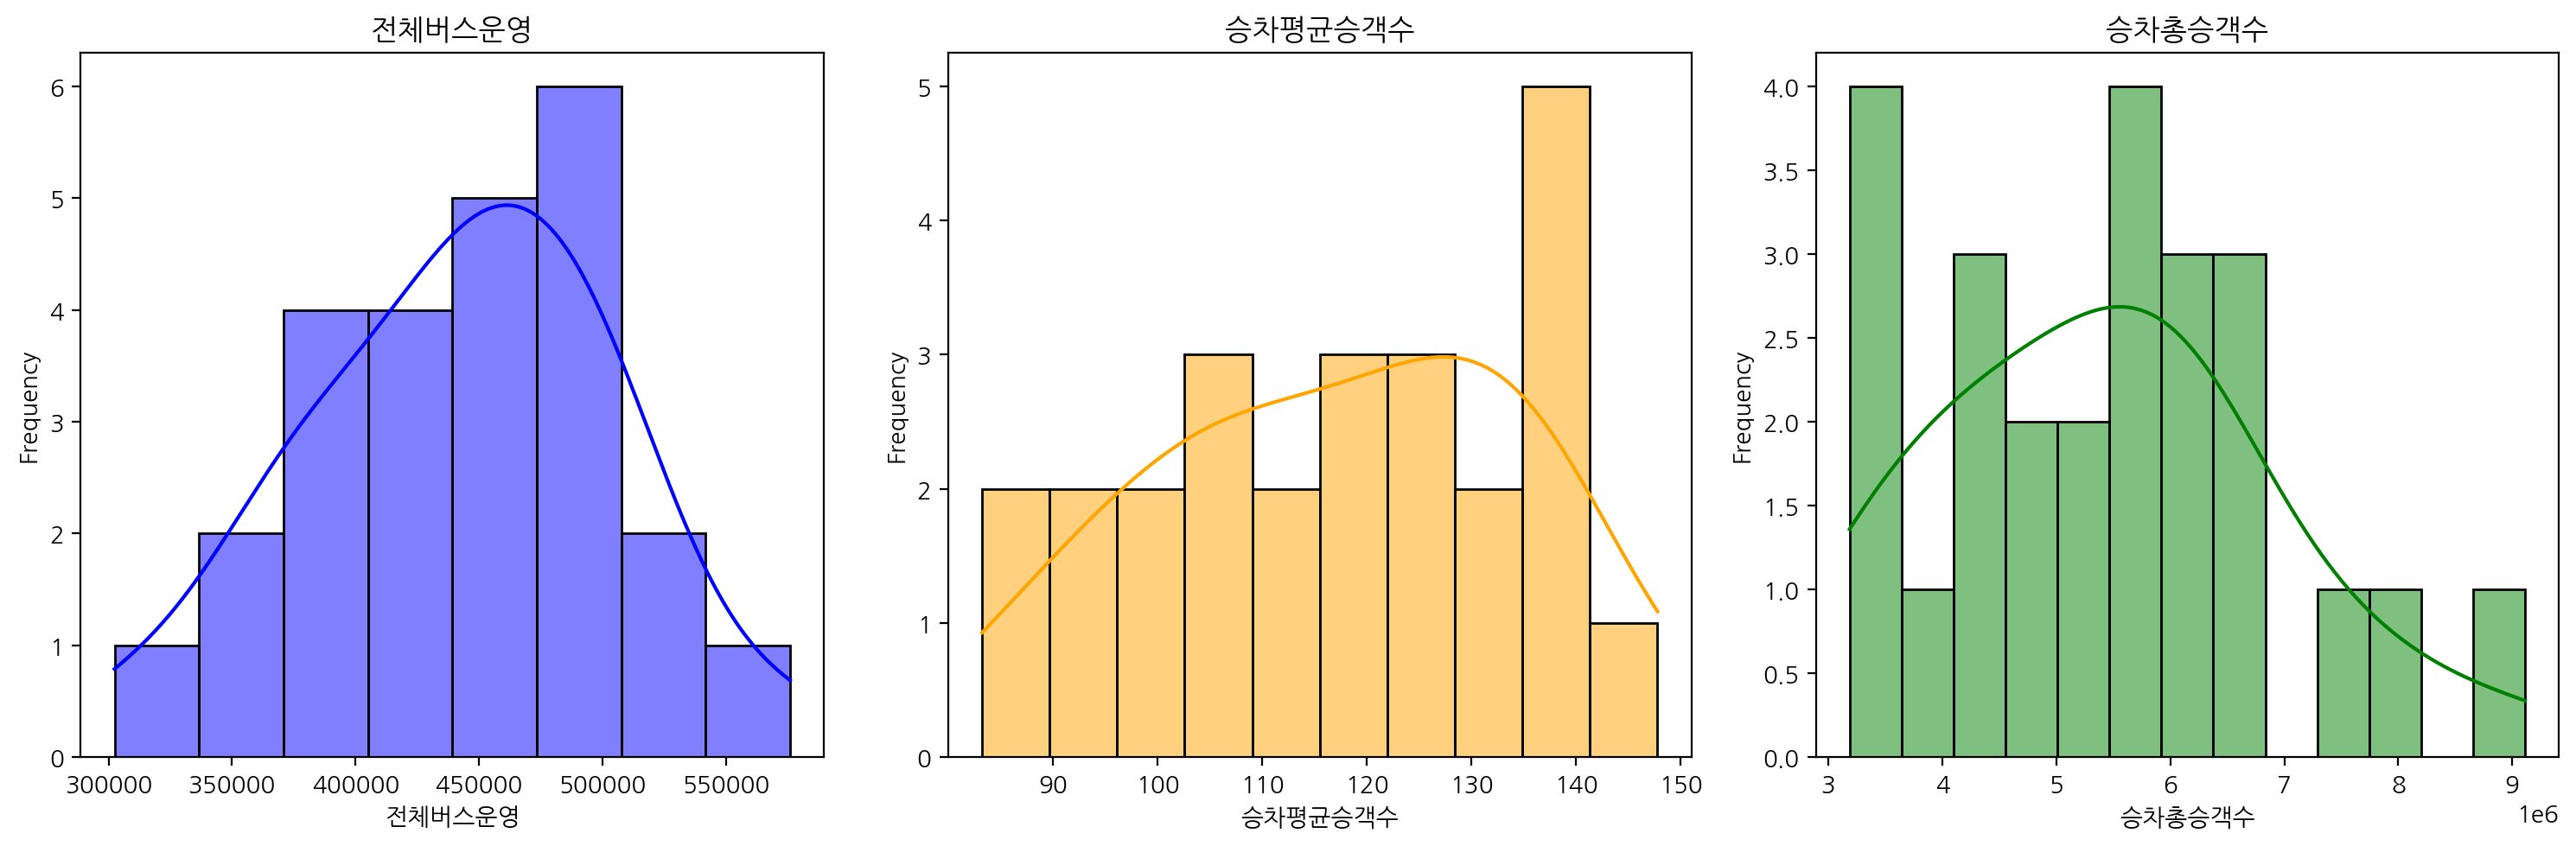

In [277]:
# Histograms
plt.figure(figsize=(15, 5))
 
plt.subplot(1, 3, 1)
sns.histplot(df_merged['전체버스운영'], bins=8, kde=True, color='blue')
plt.title('전체버스운영')
plt.ylabel('Frequency')
 
plt.subplot(1, 3, 2)
sns.histplot(df_merged['승차평균승객수'], bins=10, kde=True, color='orange')
plt.title('승차평균승객수')
plt.ylabel('Frequency')
 
plt.subplot(1, 3, 3)
sns.histplot(df_merged['승차총승객수'], bins=13, kde=True, color='green')
plt.title('승차총승객수')
plt.ylabel('Frequency')
 
plt.tight_layout()
plt.show()

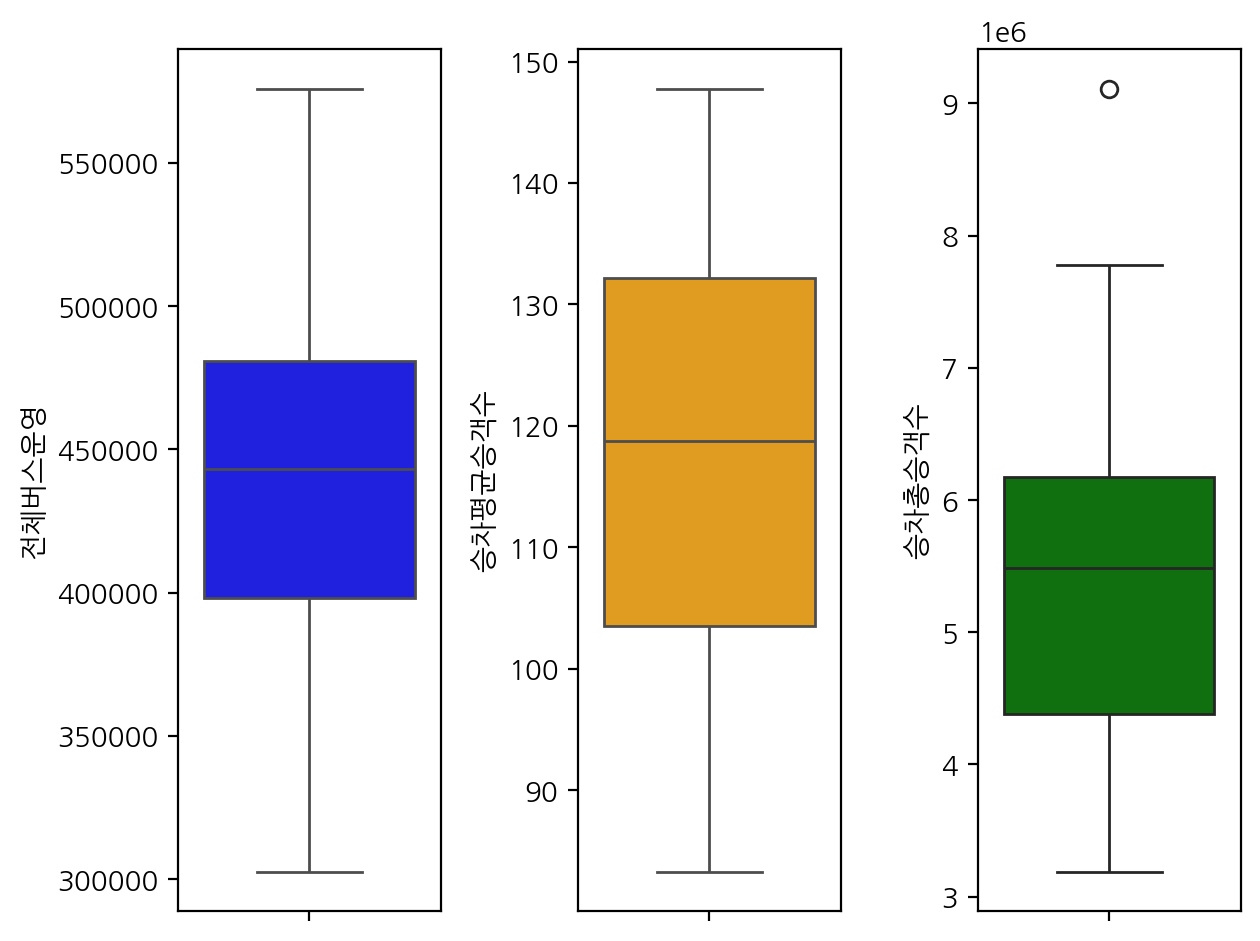

In [278]:
plt.subplot(1, 3, 1)
sns.boxplot(y=df_merged['전체버스운영'], color='blue')
 
plt.subplot(1, 3, 2)
sns.boxplot(y=df_merged['승차평균승객수'], color='orange')
 
plt.subplot(1, 3, 3)
sns.boxplot(y=df_merged['승차총승객수'], color='green')
 
plt.tight_layout()
plt.show()
 
# 의견: 승차 총승객수에 이상치가 있다.

### 3)

count    2.500000e+01
mean     2.219275e+07
std      8.977380e+06
min      9.314768e+06
25%      1.775526e+07
50%      1.965211e+07
75%      2.566449e+07
max      5.176625e+07
Name: 총 이동인구, dtype: float64


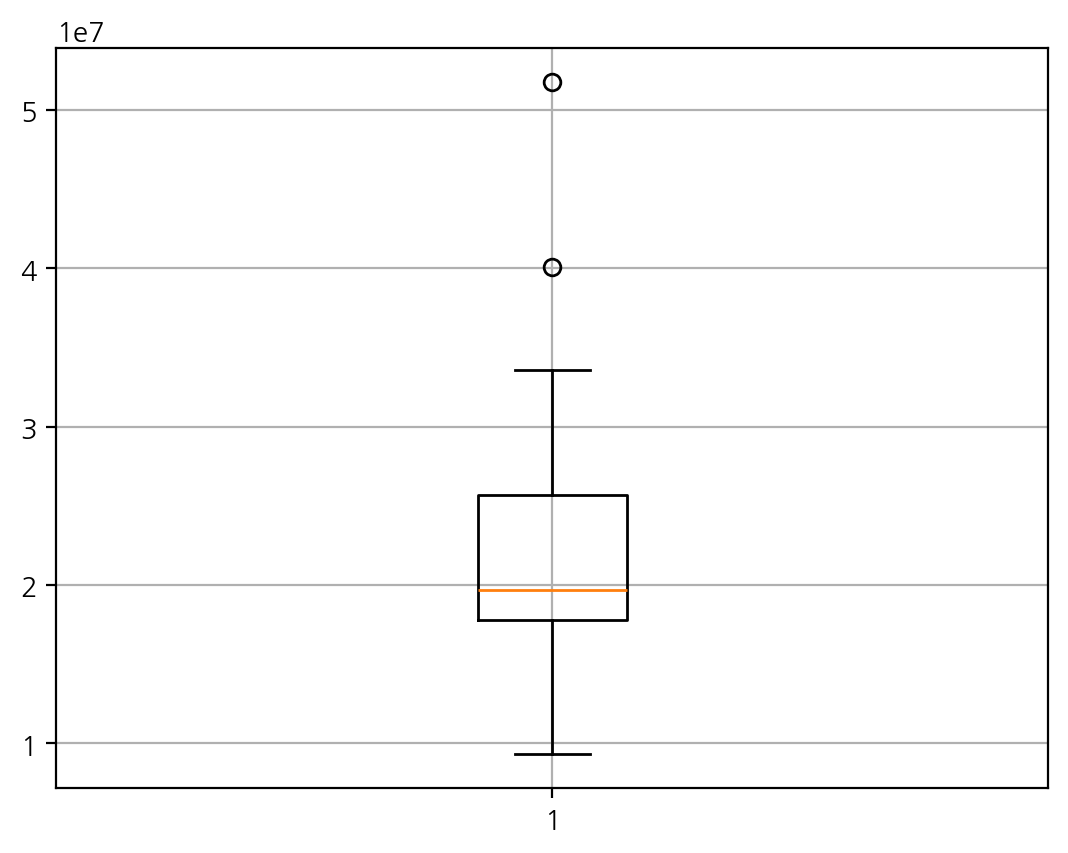

count       25.000000
mean      9341.160000
std       4729.632083
min       4266.000000
25%       6232.000000
50%       7579.000000
75%      12920.000000
max      26295.000000
dtype: float64


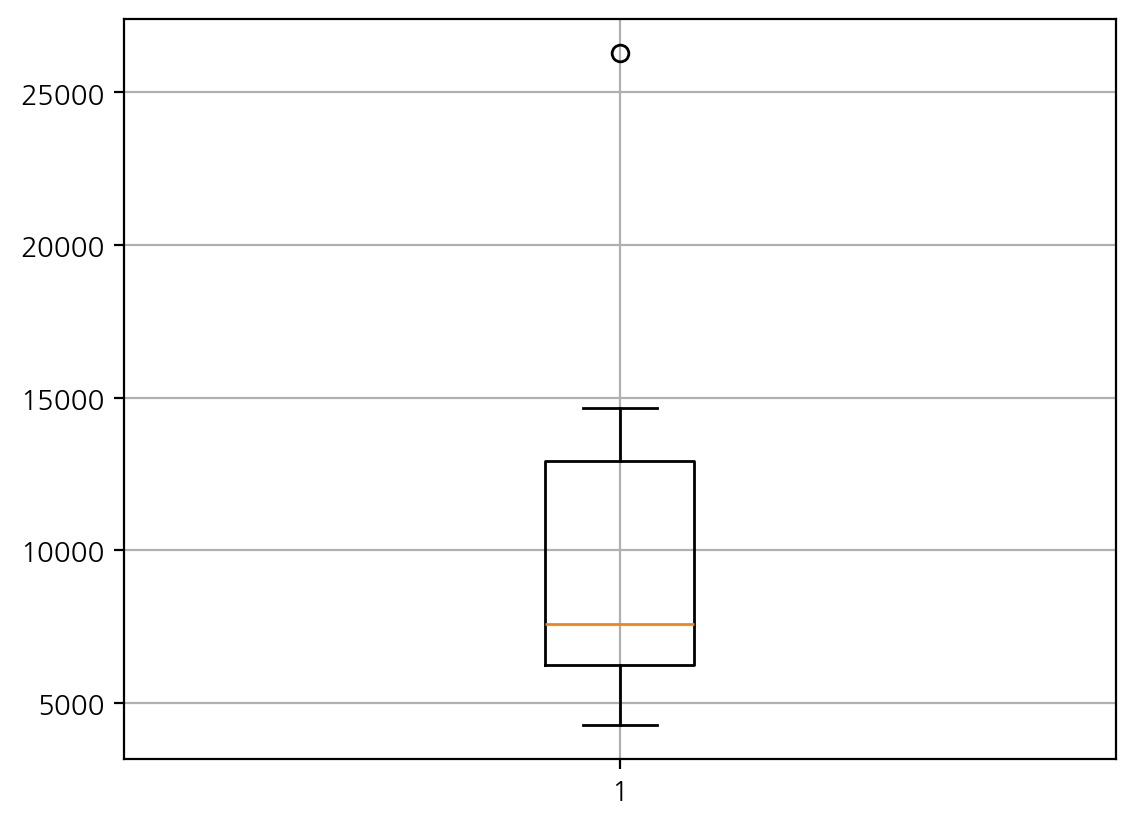

In [299]:
def analyse(to_analyse):
    print(to_analyse.describe())
    plt.boxplot(to_analyse)
    plt.grid()
    plt.show()

_ = df.columns.values.tolist()

# 의견: NaN X, 숫자형

analyse(df['총 이동인구'])

biss = df['한식 일반 음식점업'] + df['기타주점업'] + df['한식 육류요리 전문점'] + df['커피전문점']

analyse(biss)

# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 1) 가설 1

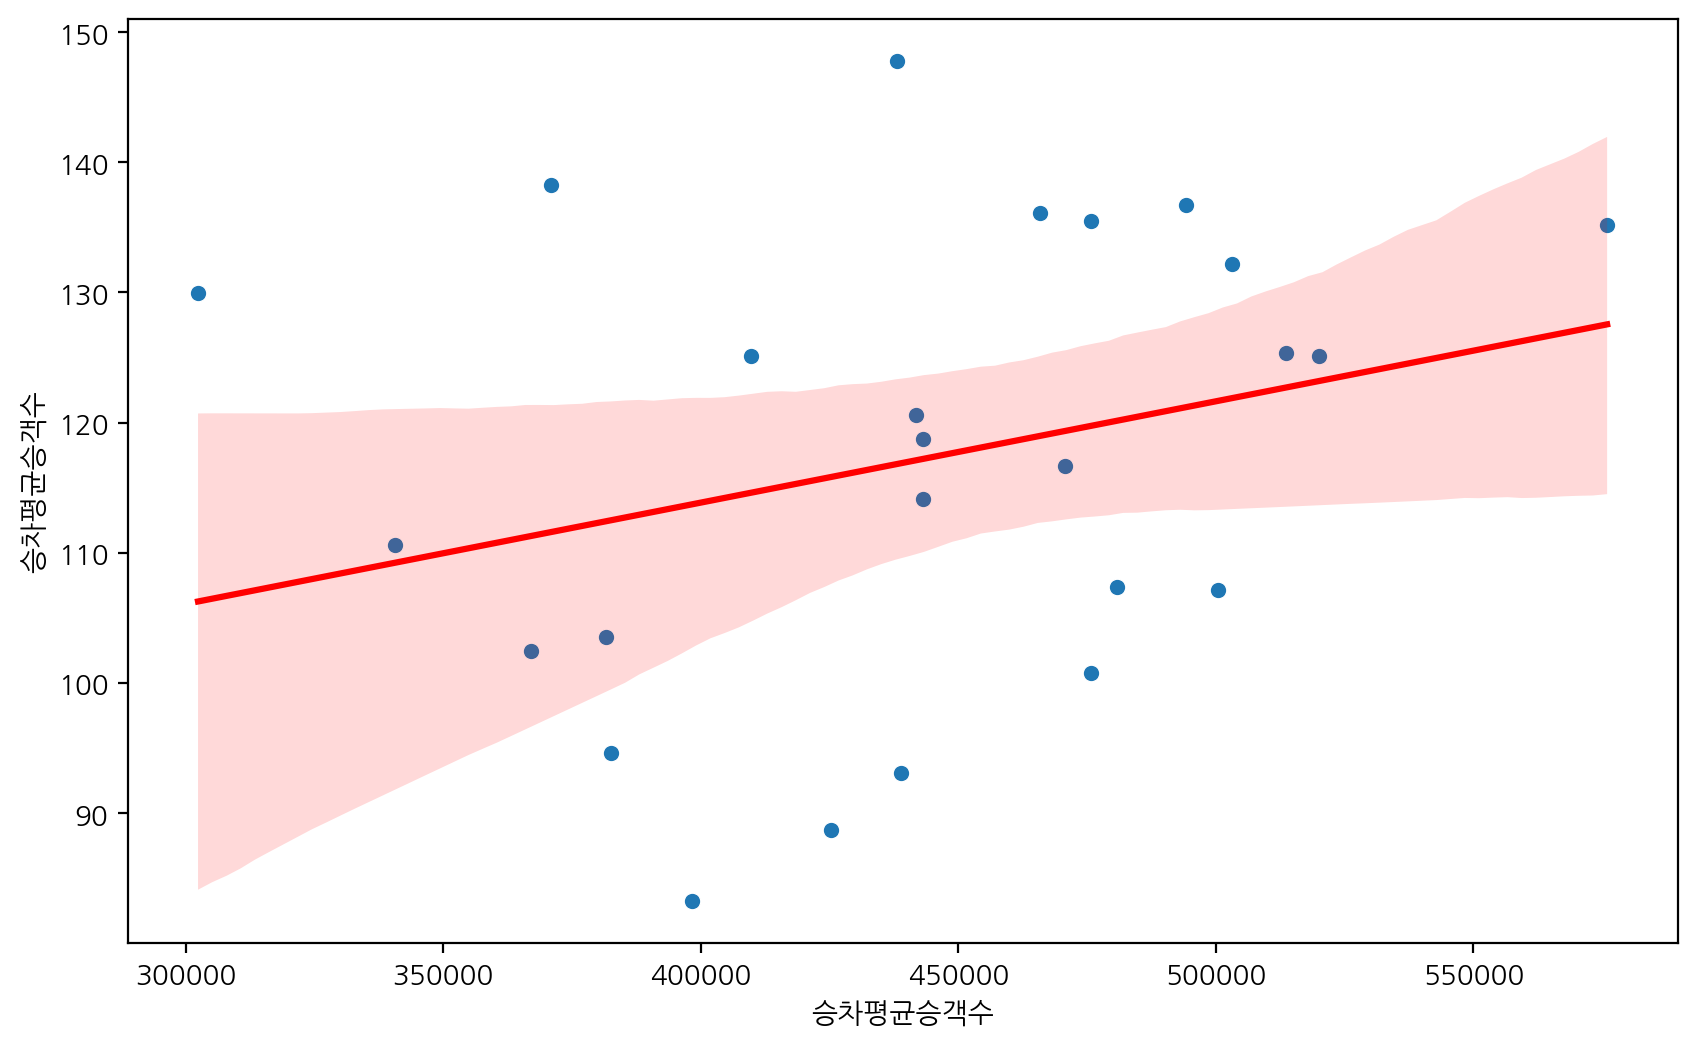

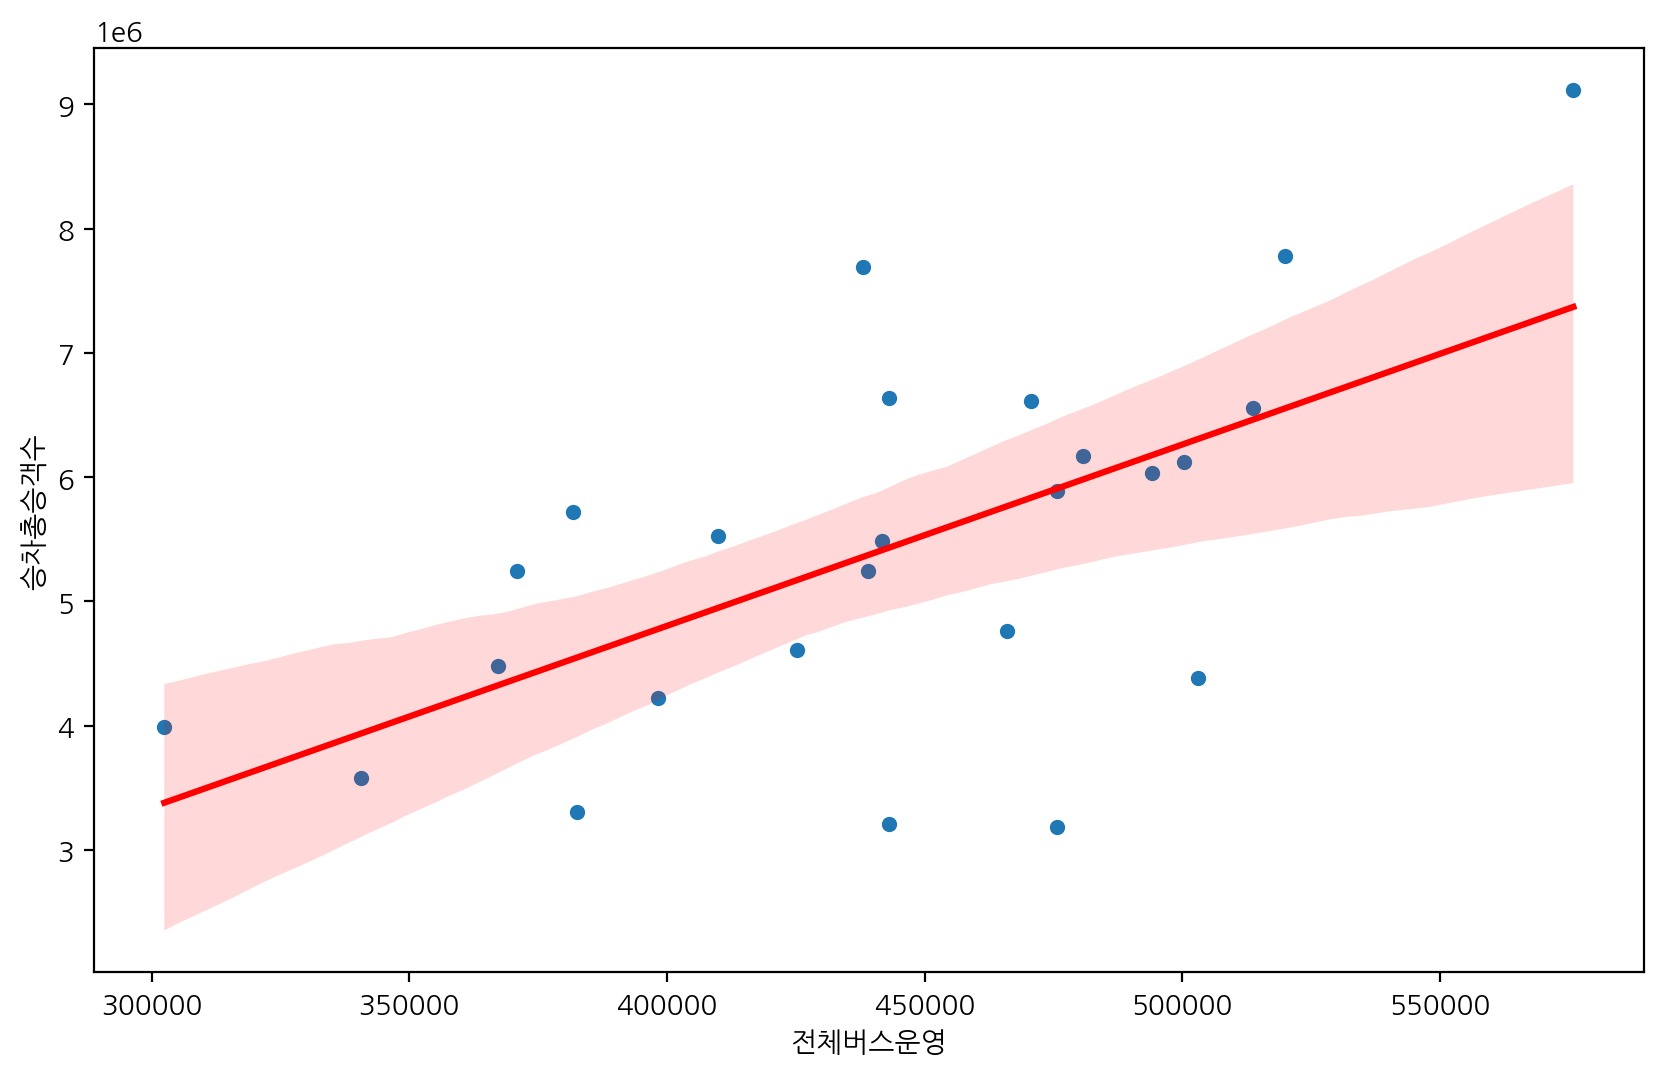

In [284]:
# Scatterplot: Total Bus Operations vs Average Passengers
plt.figure(figsize=(10,6))
sns.scatterplot(x='전체버스운영', y='승차평균승객수', data=df_merged)
sns.regplot(x='전체버스운영', y='승차평균승객수', data=df_merged, scatter=False, color='red')
plt.xlabel("승차평균승객수")
plt.ylabel("승차평균승객수")
plt.show()
 
# Scatterplot: Total Bus Operations vs Total Passengers
plt.figure(figsize=(10,6))
sns.scatterplot(x='전체버스운영', y='승차총승객수', data=df_merged)
sns.regplot(x='전체버스운영', y='승차총승객수', data=df_merged, scatter=False, color='red')
plt.xlabel("전체버스운영")
plt.ylabel("승차총승객수")
plt.show()

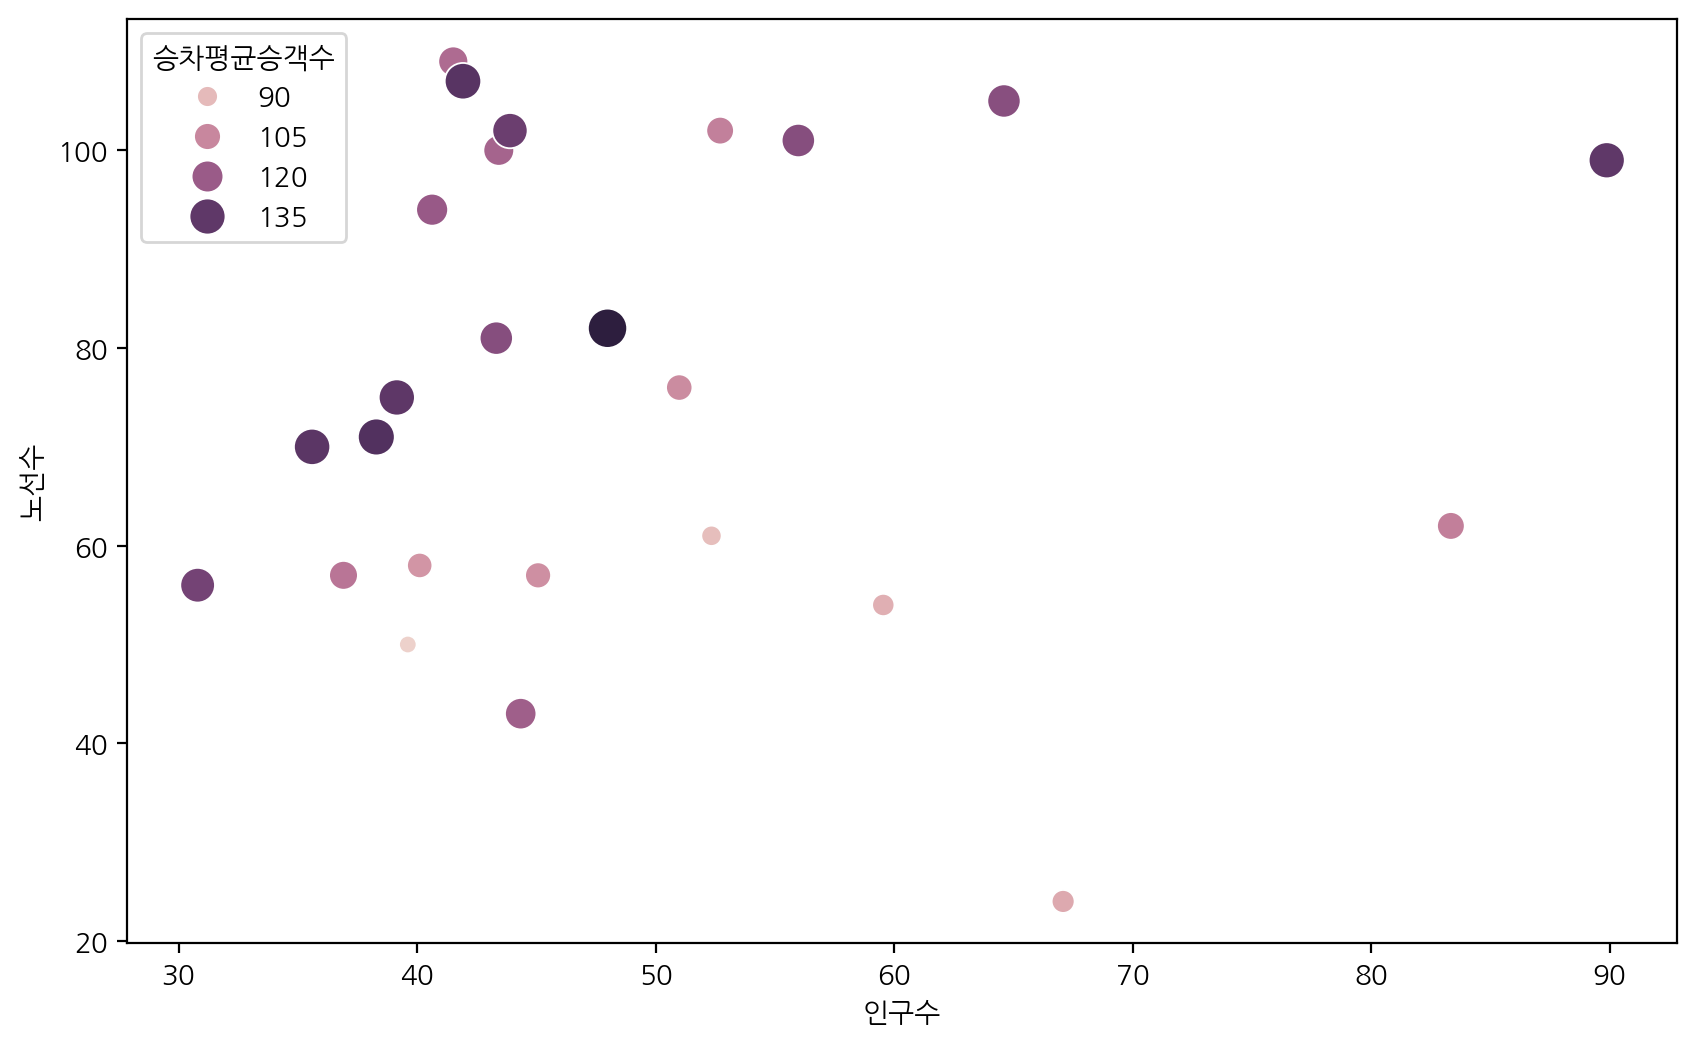

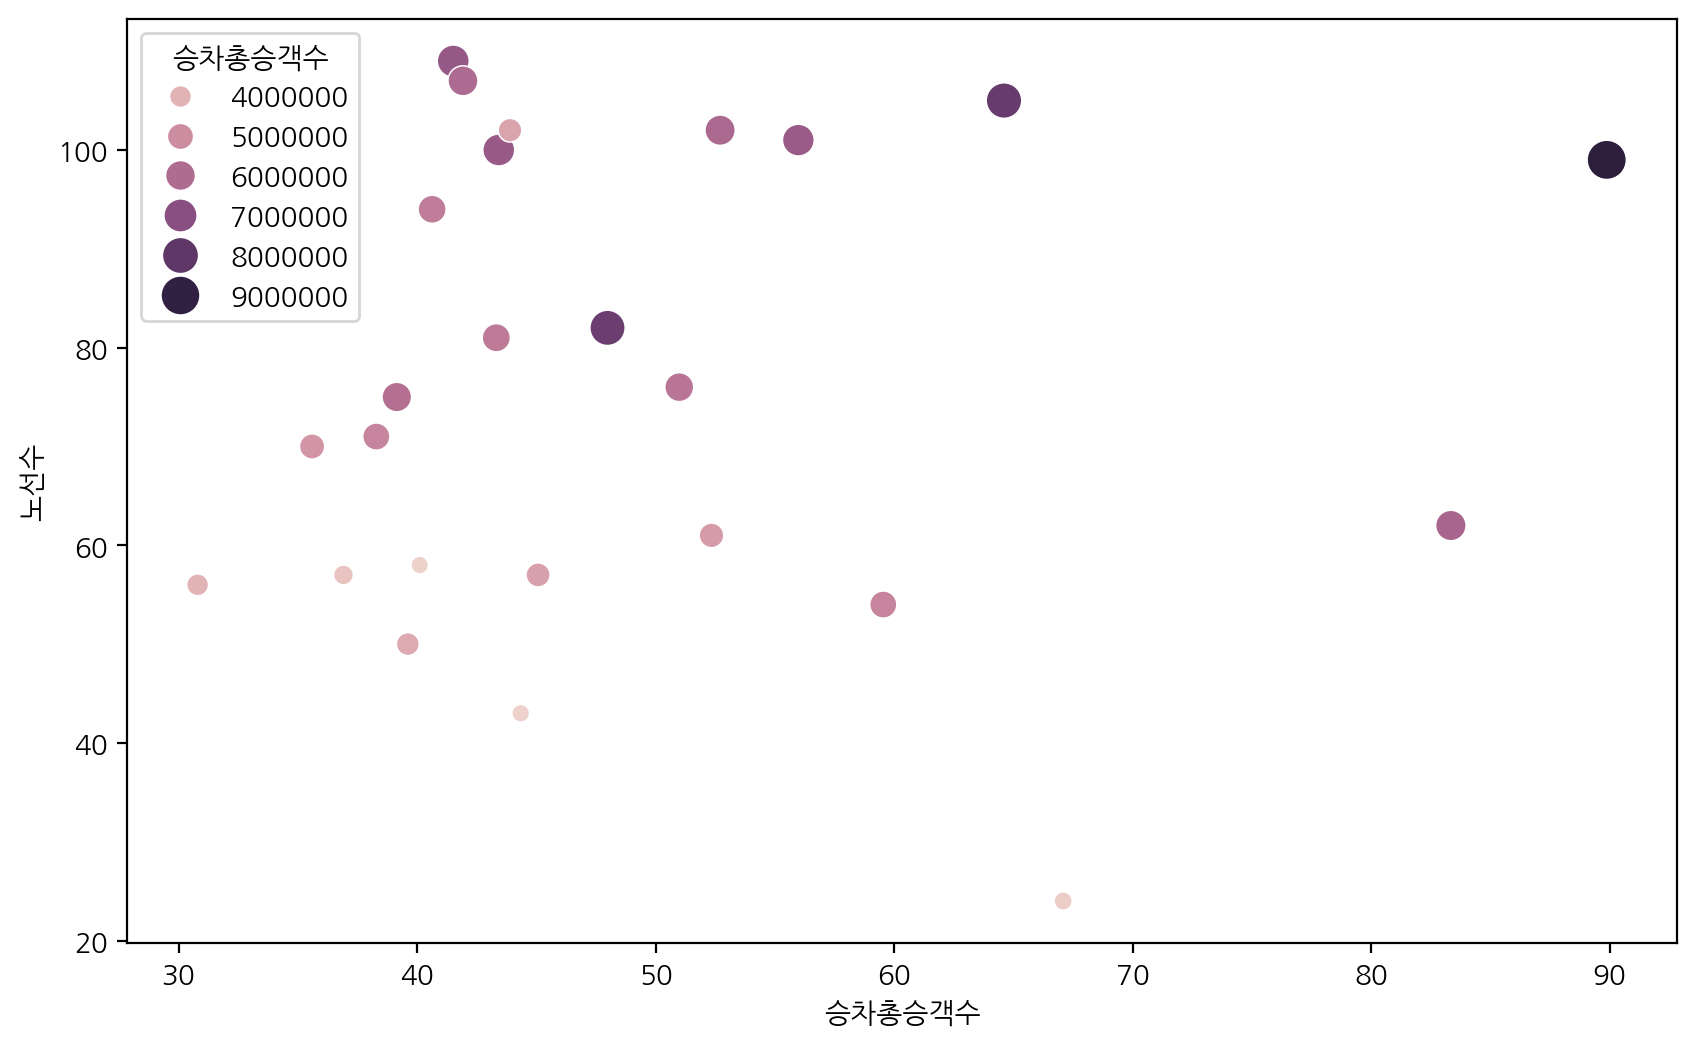

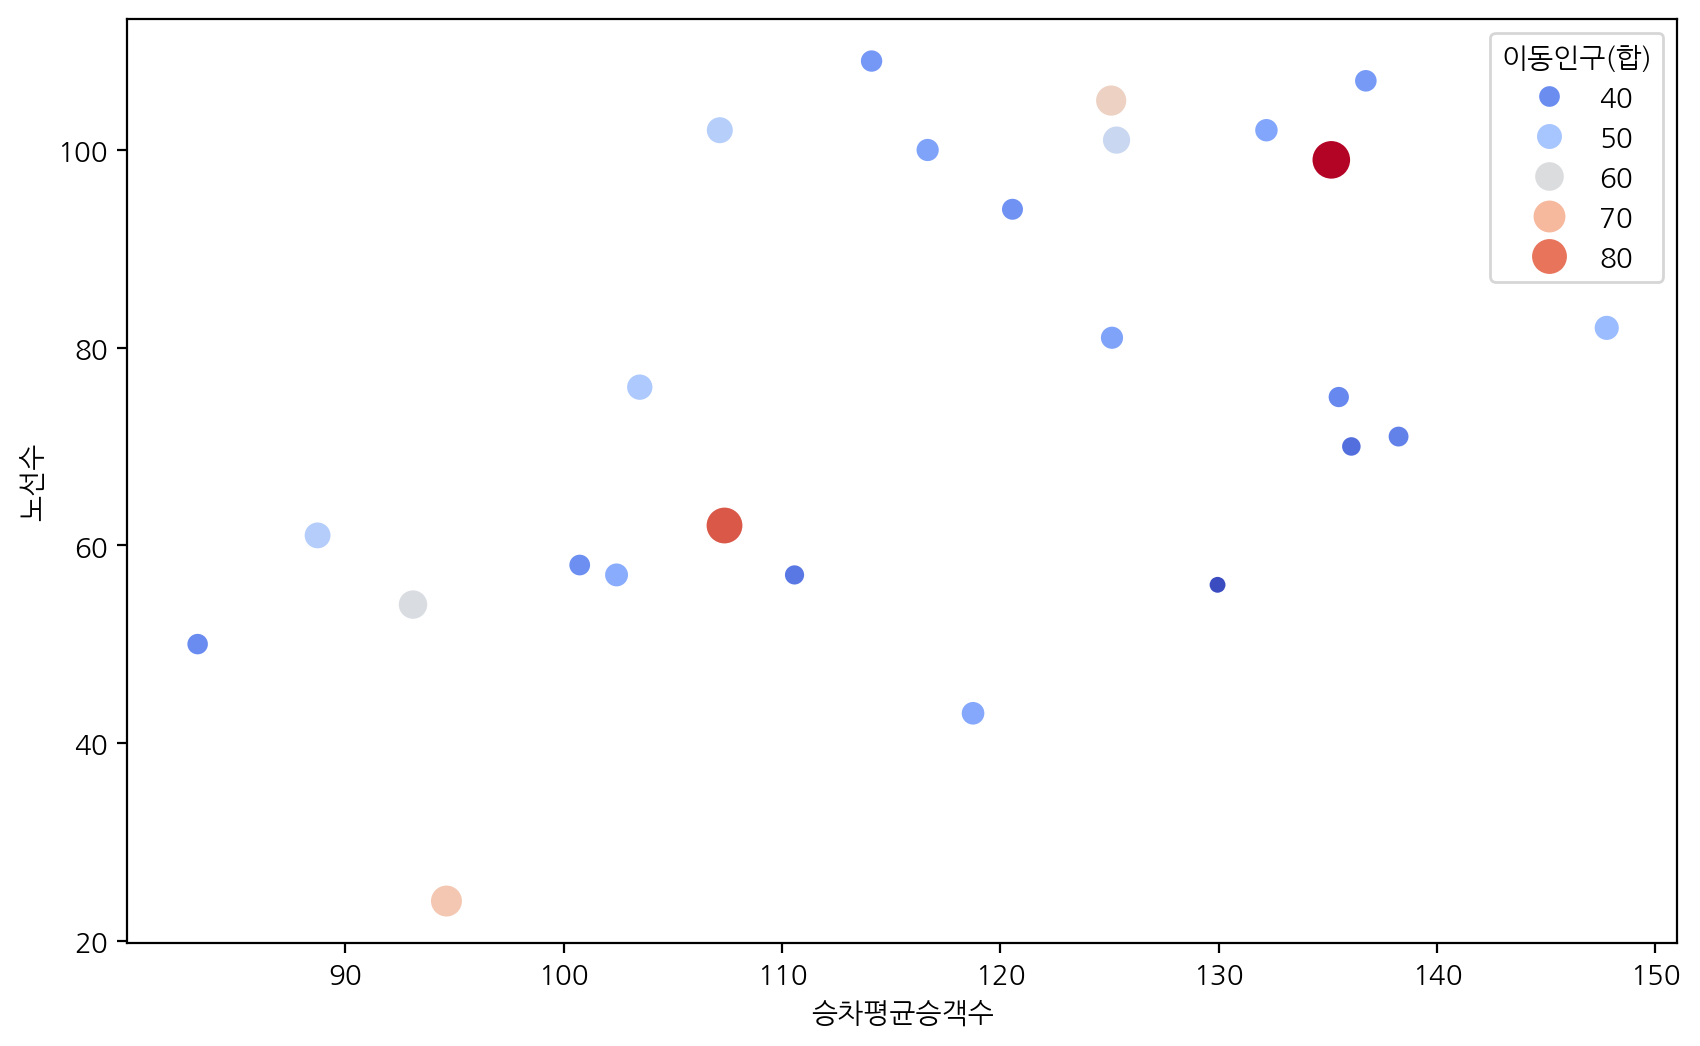

In [173]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='이동인구(합)', y='노선수', data=df, hue='승차평균승객수', size='승차평균승객수', sizes=(40, 200))
plt.xlabel("인구수")
plt.ylabel("노선수")
plt.show()
 
plt.figure(figsize=(10,6))
sns.scatterplot(x='이동인구(합)', y='노선수', data=df, hue='승차총승객수', size='승차총승객수', sizes=(40, 200))
plt.xlabel("승차총승객수")
plt.ylabel("노선수")
plt.show()
 
plt.figure(figsize=(10,6))
sns.scatterplot(x='승차평균승객수', y='노선수', data=df, hue='이동인구(합)', palette='coolwarm', size='이동인구(합)', sizes=(40, 200))
plt.xlabel("승차평균승객수")
plt.ylabel("노선수")
plt.show()

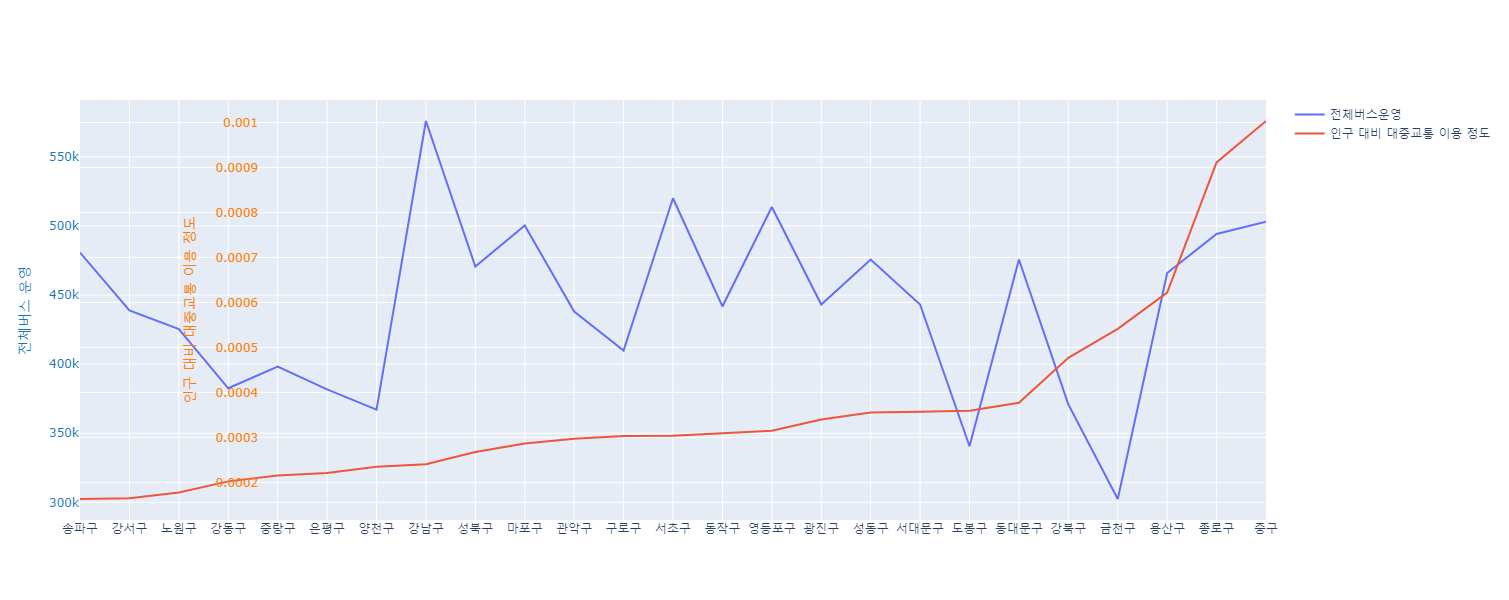

In [89]:
df_merged['인구 대비 대중교통 이용 정도'] = df_merged['승차평균승객수']/df_merged['인구수']
df_merged = df_merged.sort_values(by='인구 대비 대중교통 이용 정도')
fig = go.Figure()

fig.add_trace(go.Scatter(y=df_merged['전체버스운영'], name='전체버스운영', x=df_merged['자치구']))
fig.add_trace(go.Scatter(y=df_merged['인구 대비 대중교통 이용 정도'], name='인구 대비 대중교통 이용 정도', yaxis='y2', x=df_merged['자치구']))
fig.update_layout(
    height = 600,
    yaxis=dict(
        title="전체버스 운영",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="인구 대비 대중교통 이용 정도",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        overlaying="y",
        side="left",
        position=0.15
    ),
    yaxis3=dict(
        title="yaxis3 title",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
)

In [83]:
import statsmodels.api as sm
X = df_merged['전체버스운영']
Y = df_merged['승차평균승객수']
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(Y, X).fit()
print("전체버스운영,승차평균승객수", model.pvalues[1])
 
X = df_merged['전체버스운영']
Y = df_merged['승차총승객수']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print("전체버스운영,승차총승객수:", model.pvalues[1])

전체버스운영,승차평균승객수 0.1752487369403411
전체버스운영,승차총승객수: 0.0012415952375277046


### 2)

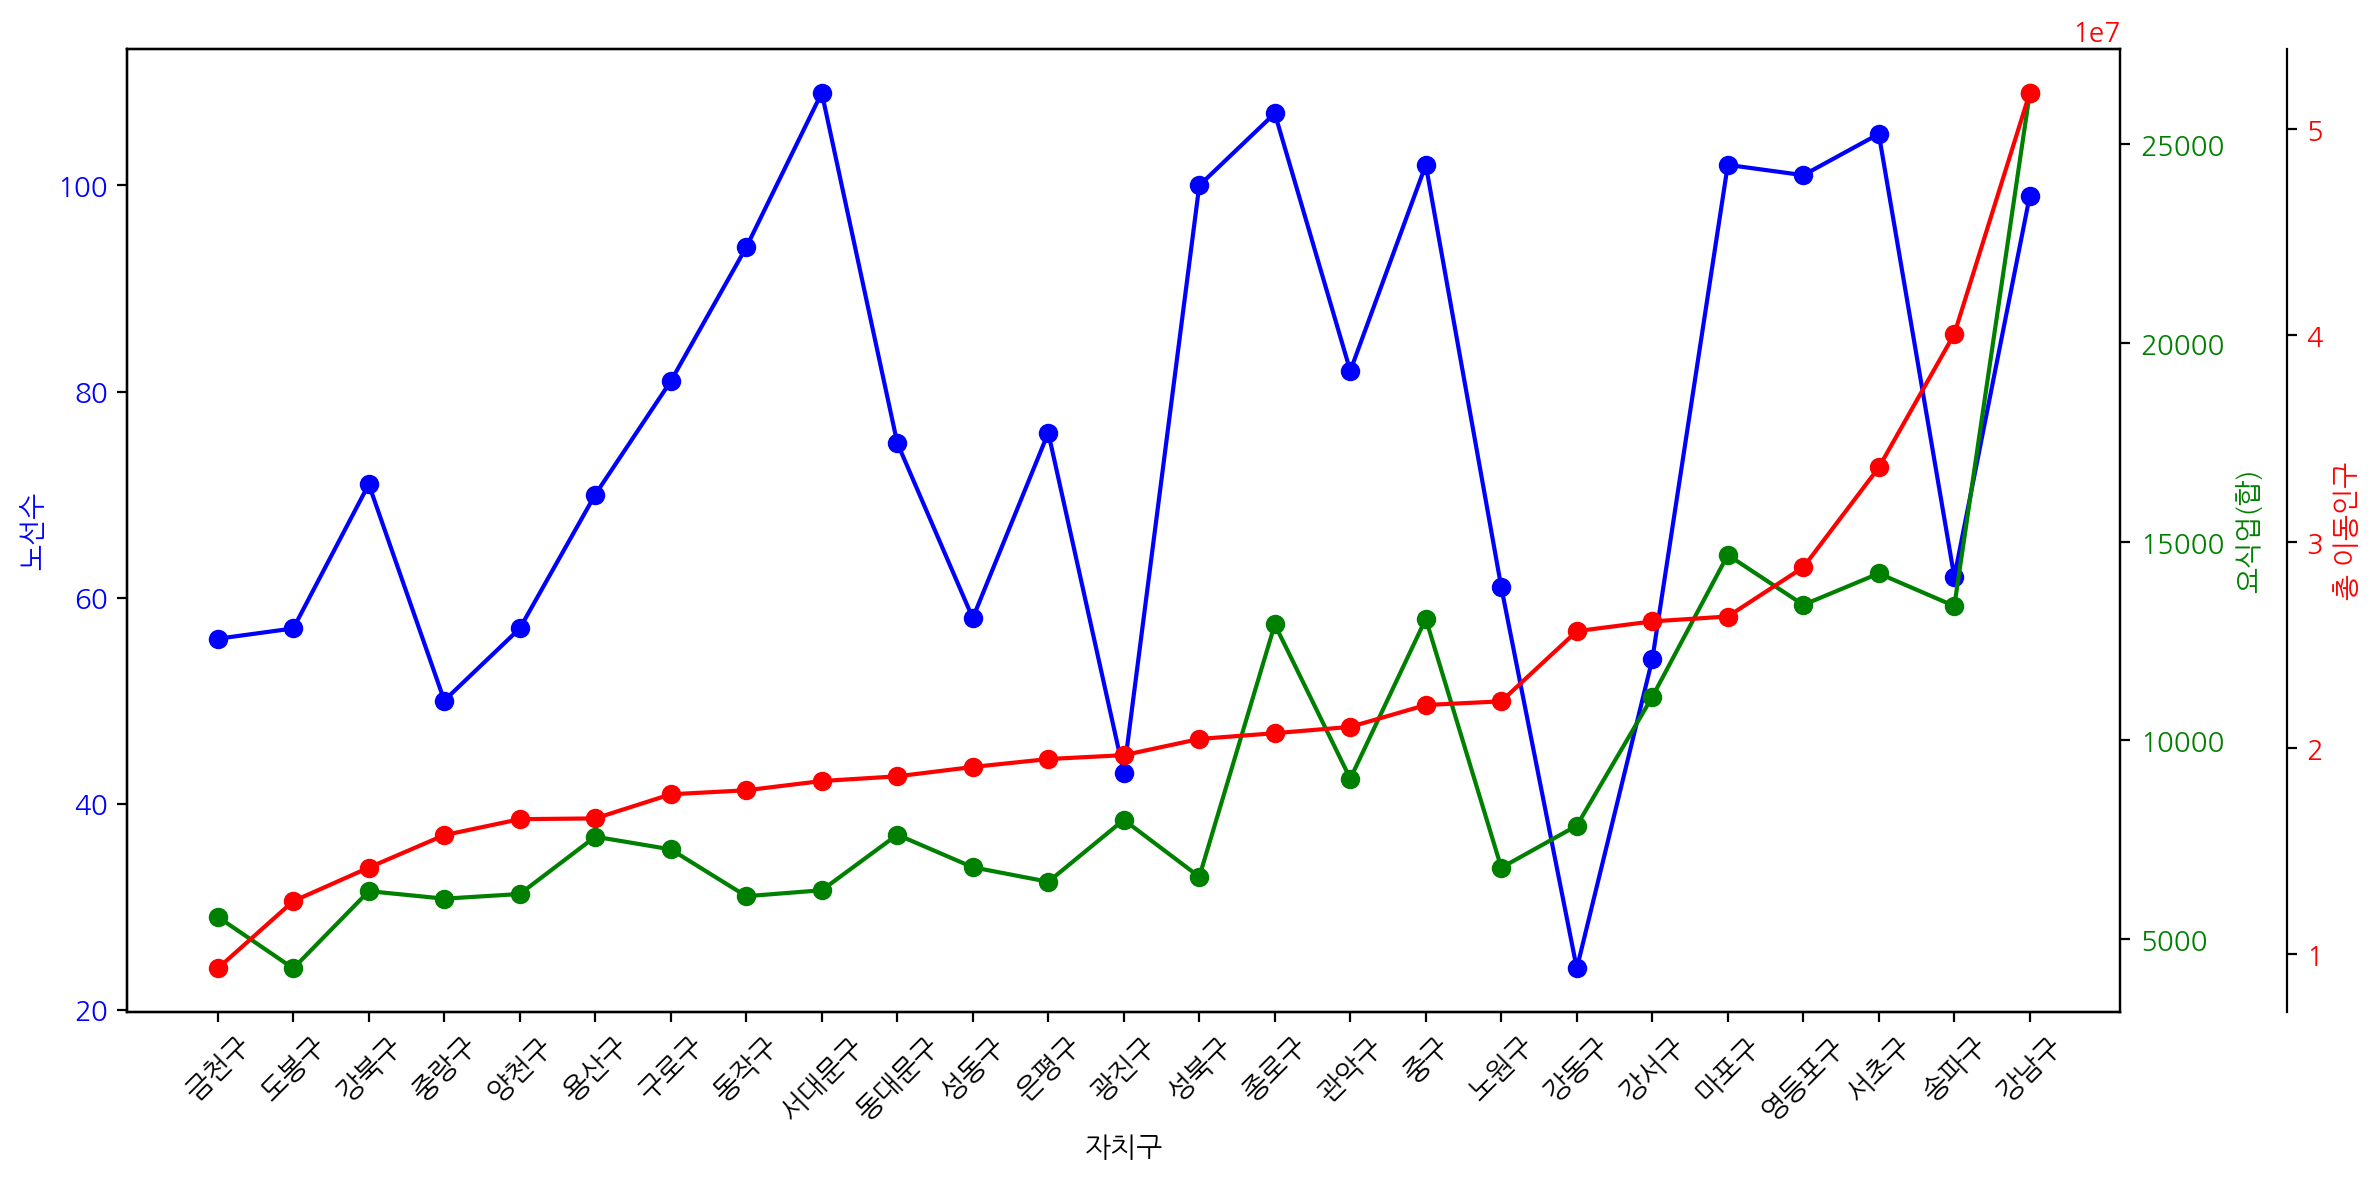

In [307]:
fig, ax1 = plt.subplots(figsize=(12,6))


# 첫 번째 y축: '노선수'
ax1.set_xlabel('자치구')
ax1.set_ylabel('노선수', color='b')
ax1.plot(bis['자치구'], bis['노선수'], marker='o', color='b', label='노선수')
ax1.tick_params(axis='y', labelcolor='b')
plt.xticks(rotation=45)
# 두 번째 y축: '요식업(합)'
ax2 = ax1.twinx()
ax2.set_ylabel('요식업(합)', color='g')
ax2.plot(bis['자치구'], bis['요식업(합)'], marker='o', color='g', label='요식업(합)')
ax2.tick_params(axis='y', labelcolor='g')
plt.xticks(rotation=45)
# 세 번째 y축: '총 이동인구'
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 세 번째 y축을 오른쪽으로 이동
ax3.set_ylabel('총 이동인구', color='r')
ax3.plot(bis['자치구'], bis['총 이동인구'], marker='o', color='r', label='총 이동인구')
ax3.tick_params(axis='y', labelcolor='r')
plt.xticks(rotation=45)
# 그래프 보여주기
fig.tight_layout()  # 그래프 요소들이 겹치지 않도록 조정
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

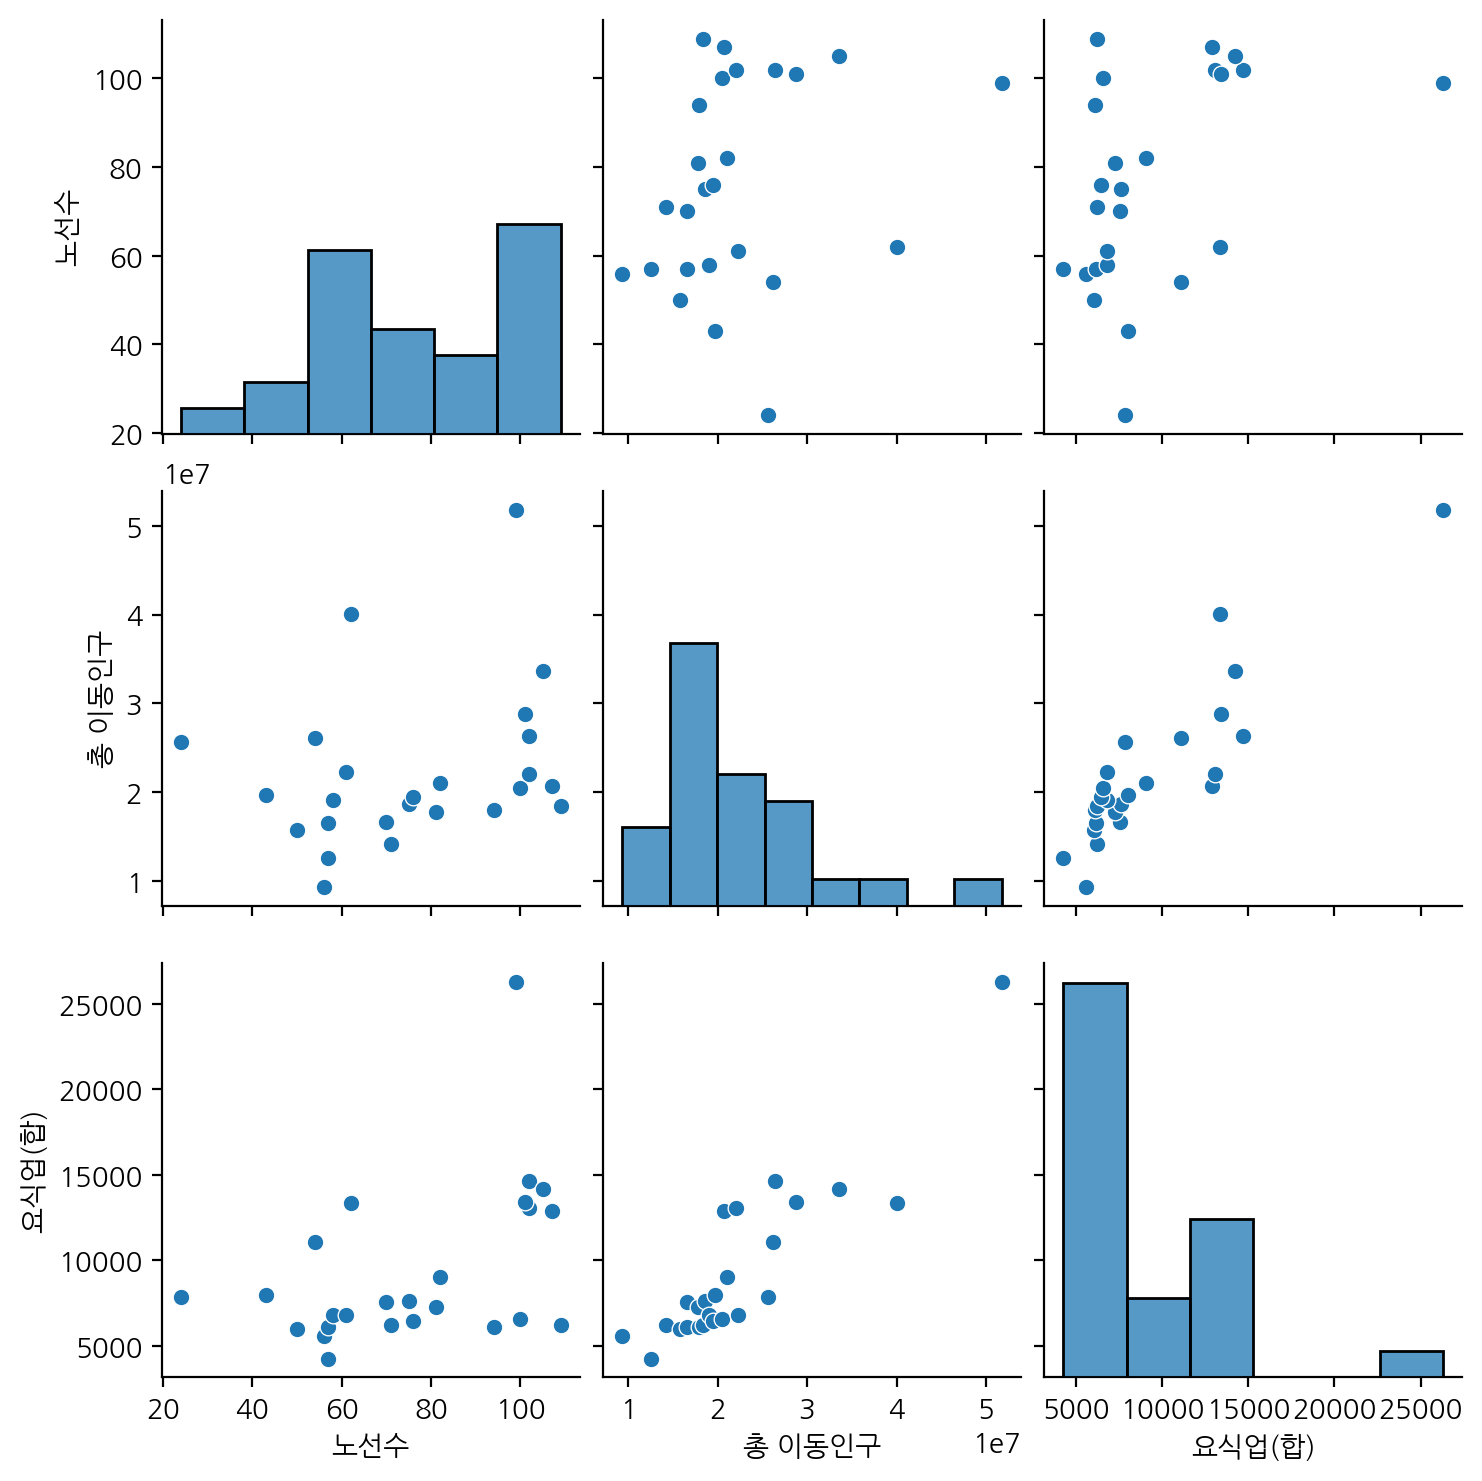

In [313]:
bis2=bis.drop(columns=['자치구'])
sns.pairplot(bis2)
plt.show

In [315]:
print(spst.pearsonr(bis['요식업(합)'],bis['총 이동인구']))
print(spst.pearsonr(bis['요식업(합)'], bis['노선수']))
print(spst.pearsonr(bis['총 이동인구'], bis['노선수']))

PearsonRResult(statistic=0.8941246733370497, pvalue=1.722008077506668e-09)
PearsonRResult(statistic=0.4485364632128029, pvalue=0.024520622383656255)
PearsonRResult(statistic=0.27175719077595667, pvalue=0.188807574849807)


### 3)

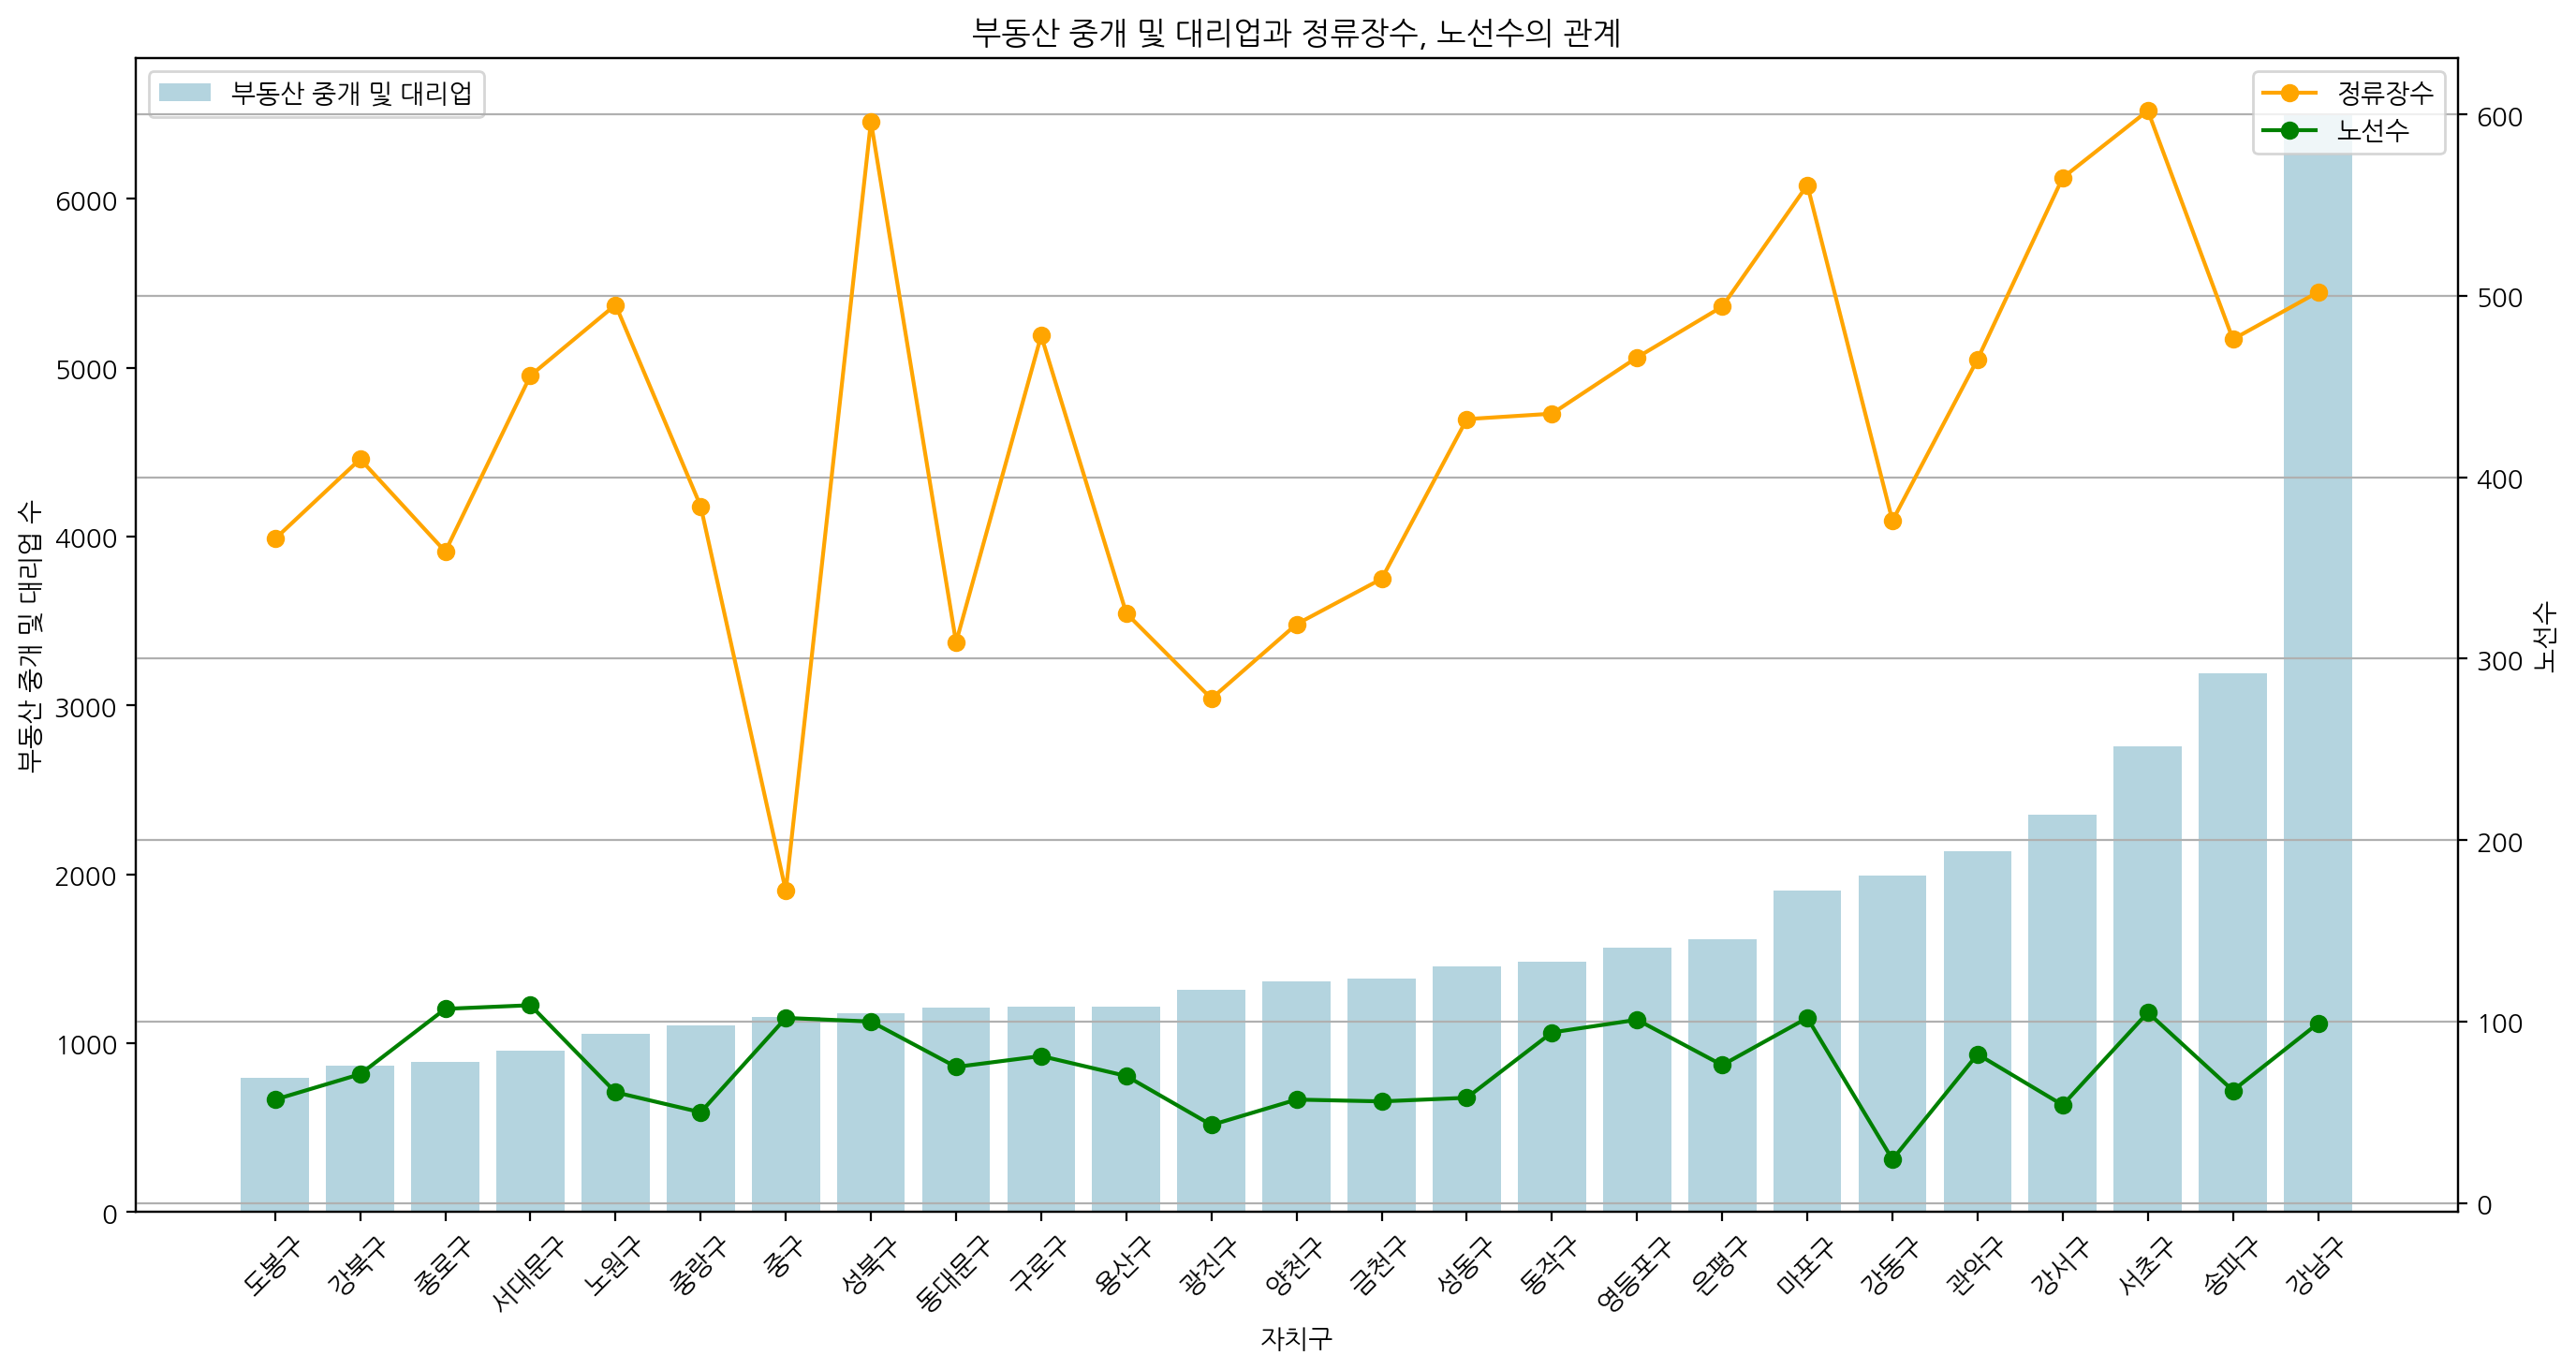

In [245]:
# 주석
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 정렬
df_sorted = df.sort_values(by='부동산 중개 및 대리업')

# 그래프 크기 설정
plt.figure(figsize=(16, 8))

# 첫 번째 y축 (부동산 중개 및 대리업)
sns.barplot(x='자치구', y='부동산 중개 및 대리업', data=df_sorted, color='lightblue', label='부동산 중개 및 대리업')
plt.ylabel('부동산 중개 및 대리업 수')

# 첫 번째 y축의 ticks 및 라벨 설정
plt.xticks(rotation=45)

# 두 번째 y축 생성
ax2 = plt.gca().twinx()

# 두 번째 y축 (정류장수)
ax2.plot(df_sorted['자치구'], df_sorted['정류장수'], color='orange', marker='o', label='정류장수')
ax2.set_ylabel('정류장수')

# 세 번째 y축 (노선수)
ax2.plot(df_sorted['자치구'], df_sorted['노선수'], color='green', marker='o', label='노선수')
ax2.set_ylabel('노선수')

# 제목 및 레전드 설정
plt.title('부동산 중개 및 대리업과 정류장수, 노선수의 관계')
ax2.legend(loc='upper right')  # 두 번째 y축에 대한 레전드
plt.grid()

# 최종 출력
plt.show()

부동산 중개업과 정류장 수의 피어슨 상관계수: 0.3635584116546928 p-value: 0.07402964194815637
부동산 중개업과 노선 수의 피어슨 상관계수: 0.14125314489310623 p-value: 0.5006312522852685


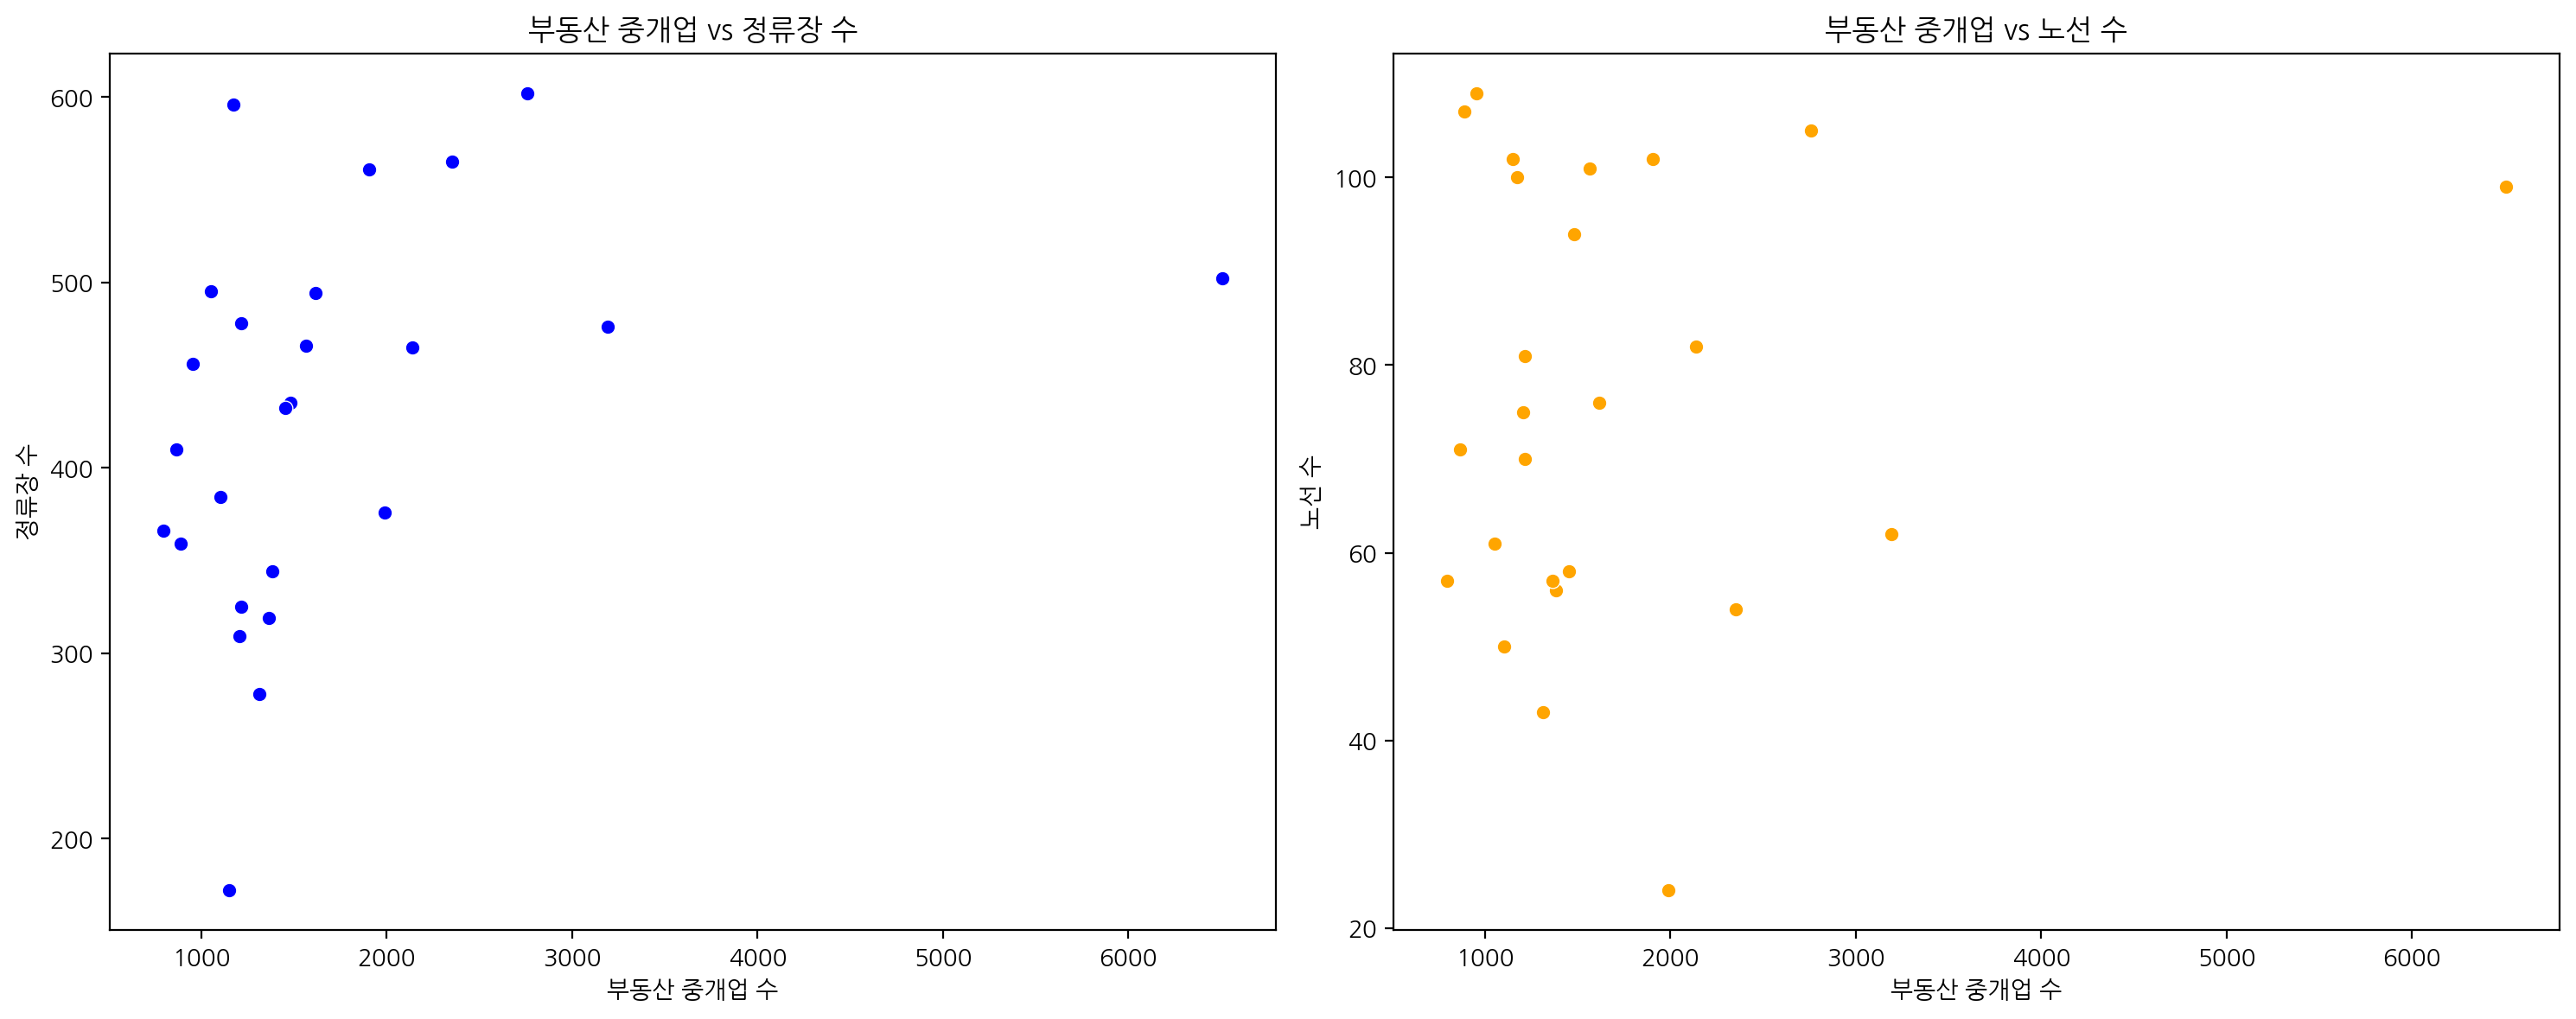

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


pearson_corr = pearsonr(df['부동산 중개 및 대리업'], df['정류장수'])
print("부동산 중개업과 정류장 수의 피어슨 상관계수:", pearson_corr[0], "p-value:", pearson_corr[1])
pearson_corr = pearsonr(df['부동산 중개 및 대리업'], df['노선수'])
print("부동산 중개업과 노선 수의 피어슨 상관계수:", pearson_corr[0], "p-value:", pearson_corr[1])

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='부동산 중개 및 대리업', y='정류장수', data=df, color='blue')
plt.title('부동산 중개업 vs 정류장 수')
plt.xlabel('부동산 중개업 수')
plt.ylabel('정류장 수')
plt.subplot(1, 2, 2)
sns.scatterplot(x='부동산 중개 및 대리업', y='노선수', data=df, color='orange')
plt.title('부동산 중개업 vs 노선 수')
plt.xlabel('부동산 중개업 수')
plt.ylabel('노선 수')

plt.tight_layout()
plt.show()

### HeatMap으로 시각화

### 1)

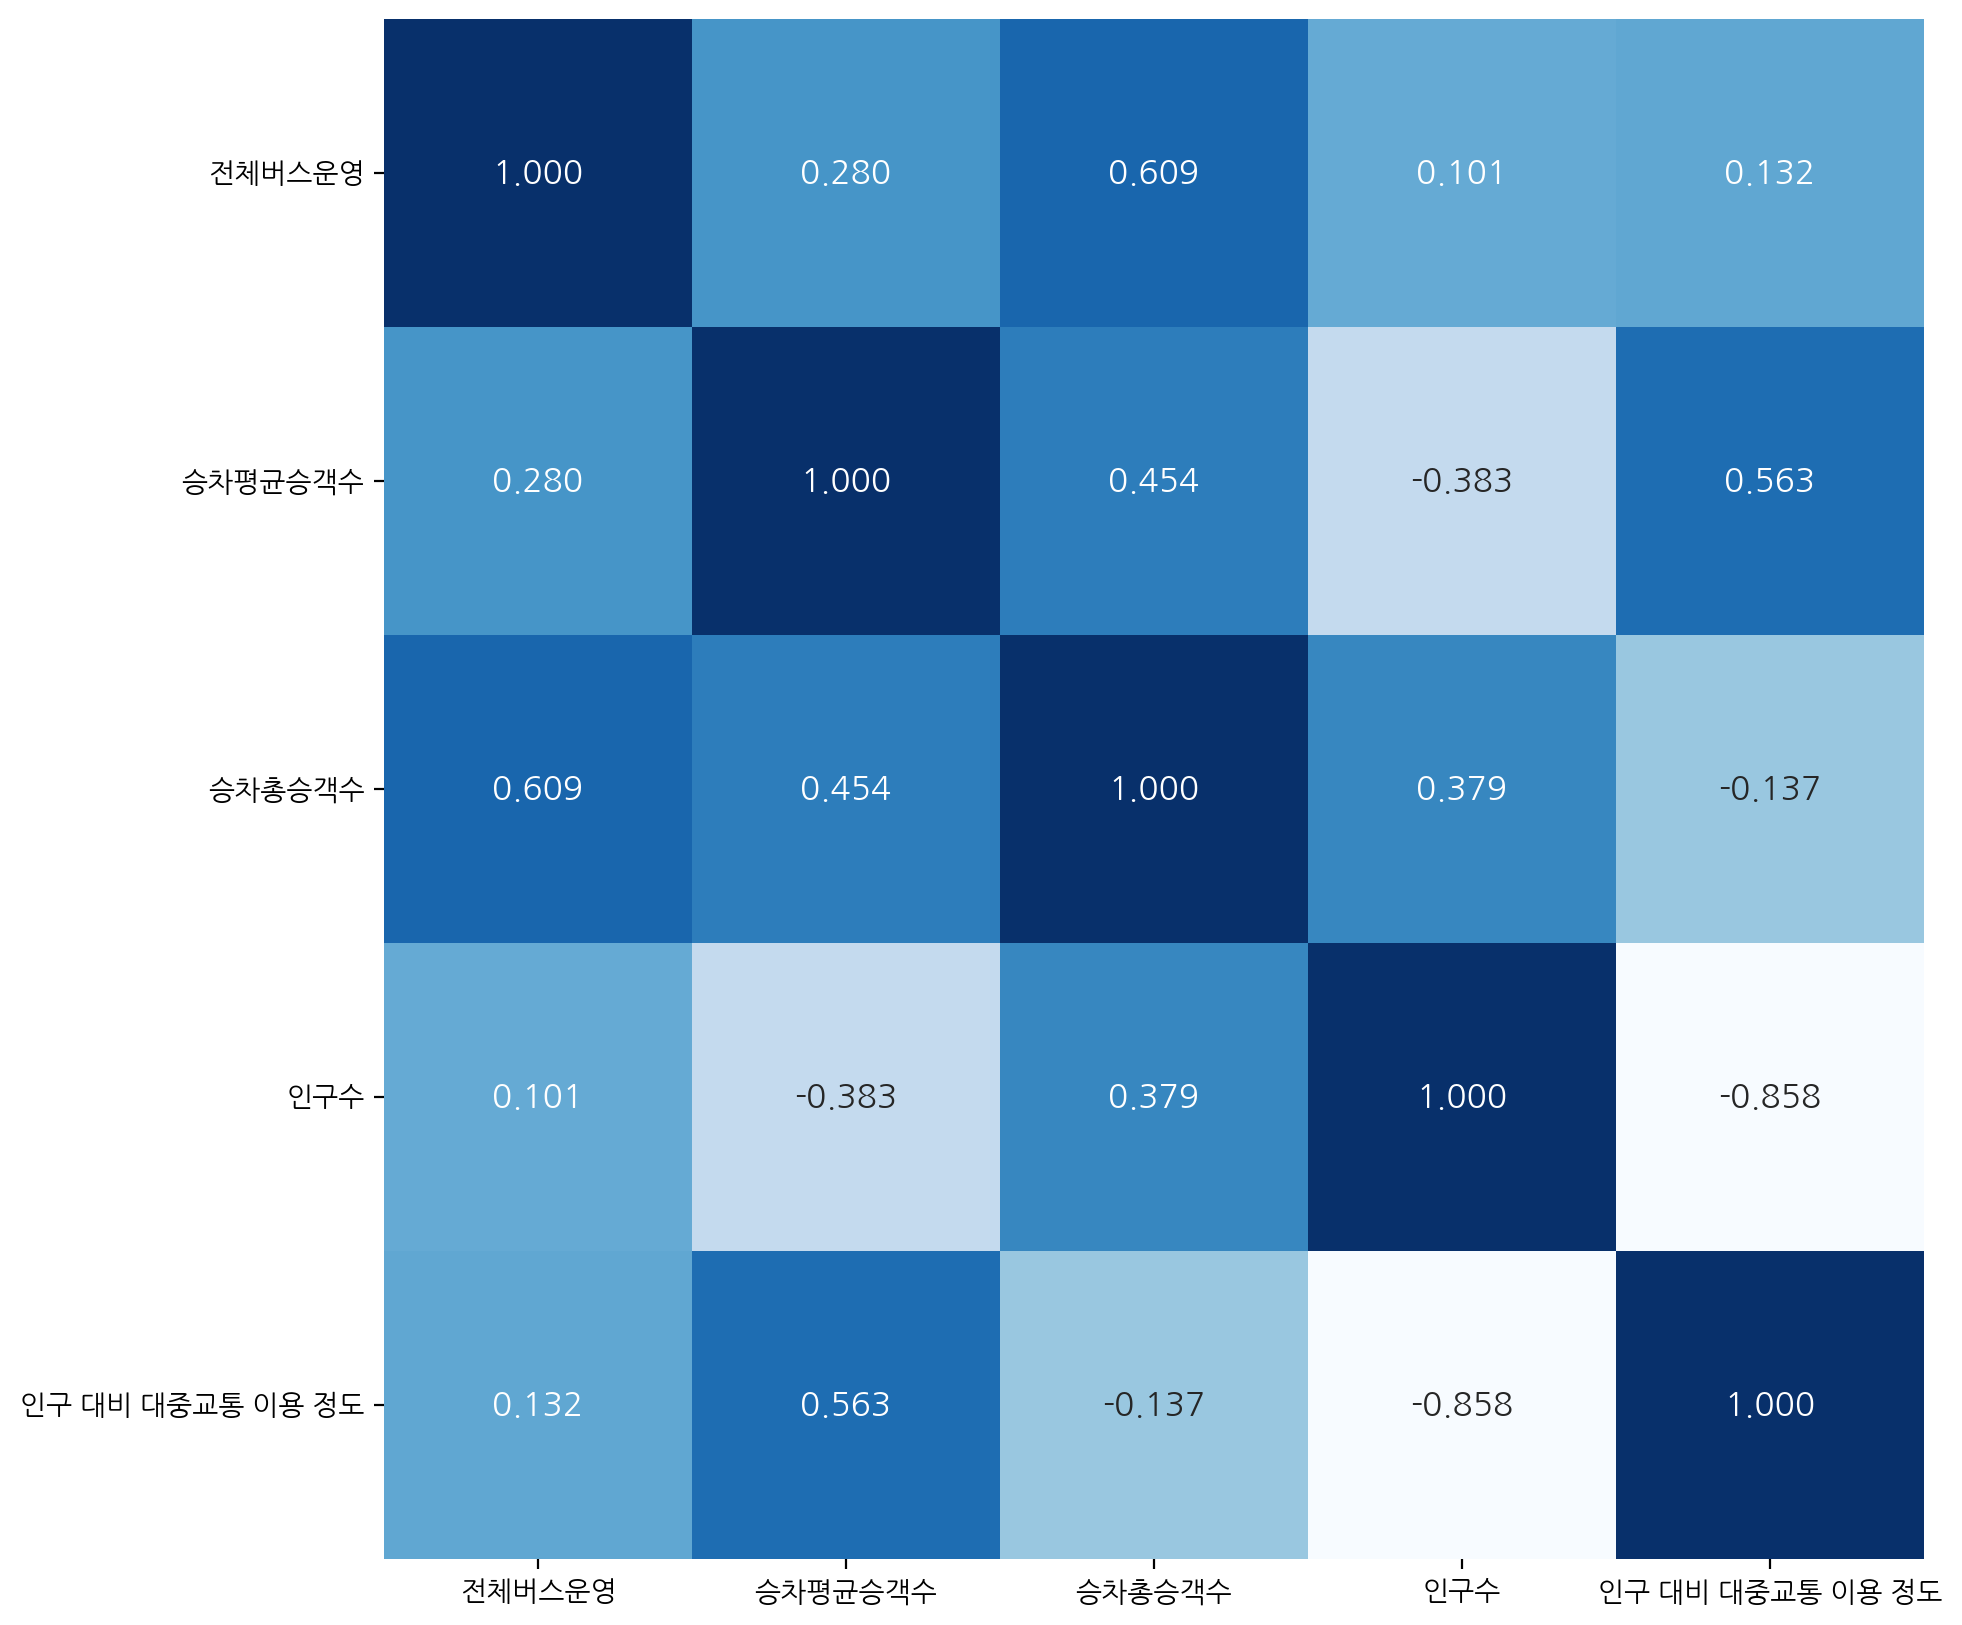

In [181]:
plt.figure(figsize=(10,10))
# 위 차트를 통해 알게된 사실을 정리해봅시다.
sns.heatmap(df_merged.corr(numeric_only=True),
            annot=True, # 숫자 적기
            cmap='Blues', # 색 변환
            cbar=False, # cbar 없애기
            square=True, # 정사각형
            fmt='.3f', # 소숫점 맞추기
            annot_kws={'size' : 12}) # 안쪽 숫자 크기
plt.xticks(rotation=360)
plt.yticks(rotation=0)
plt.show()

### 2)

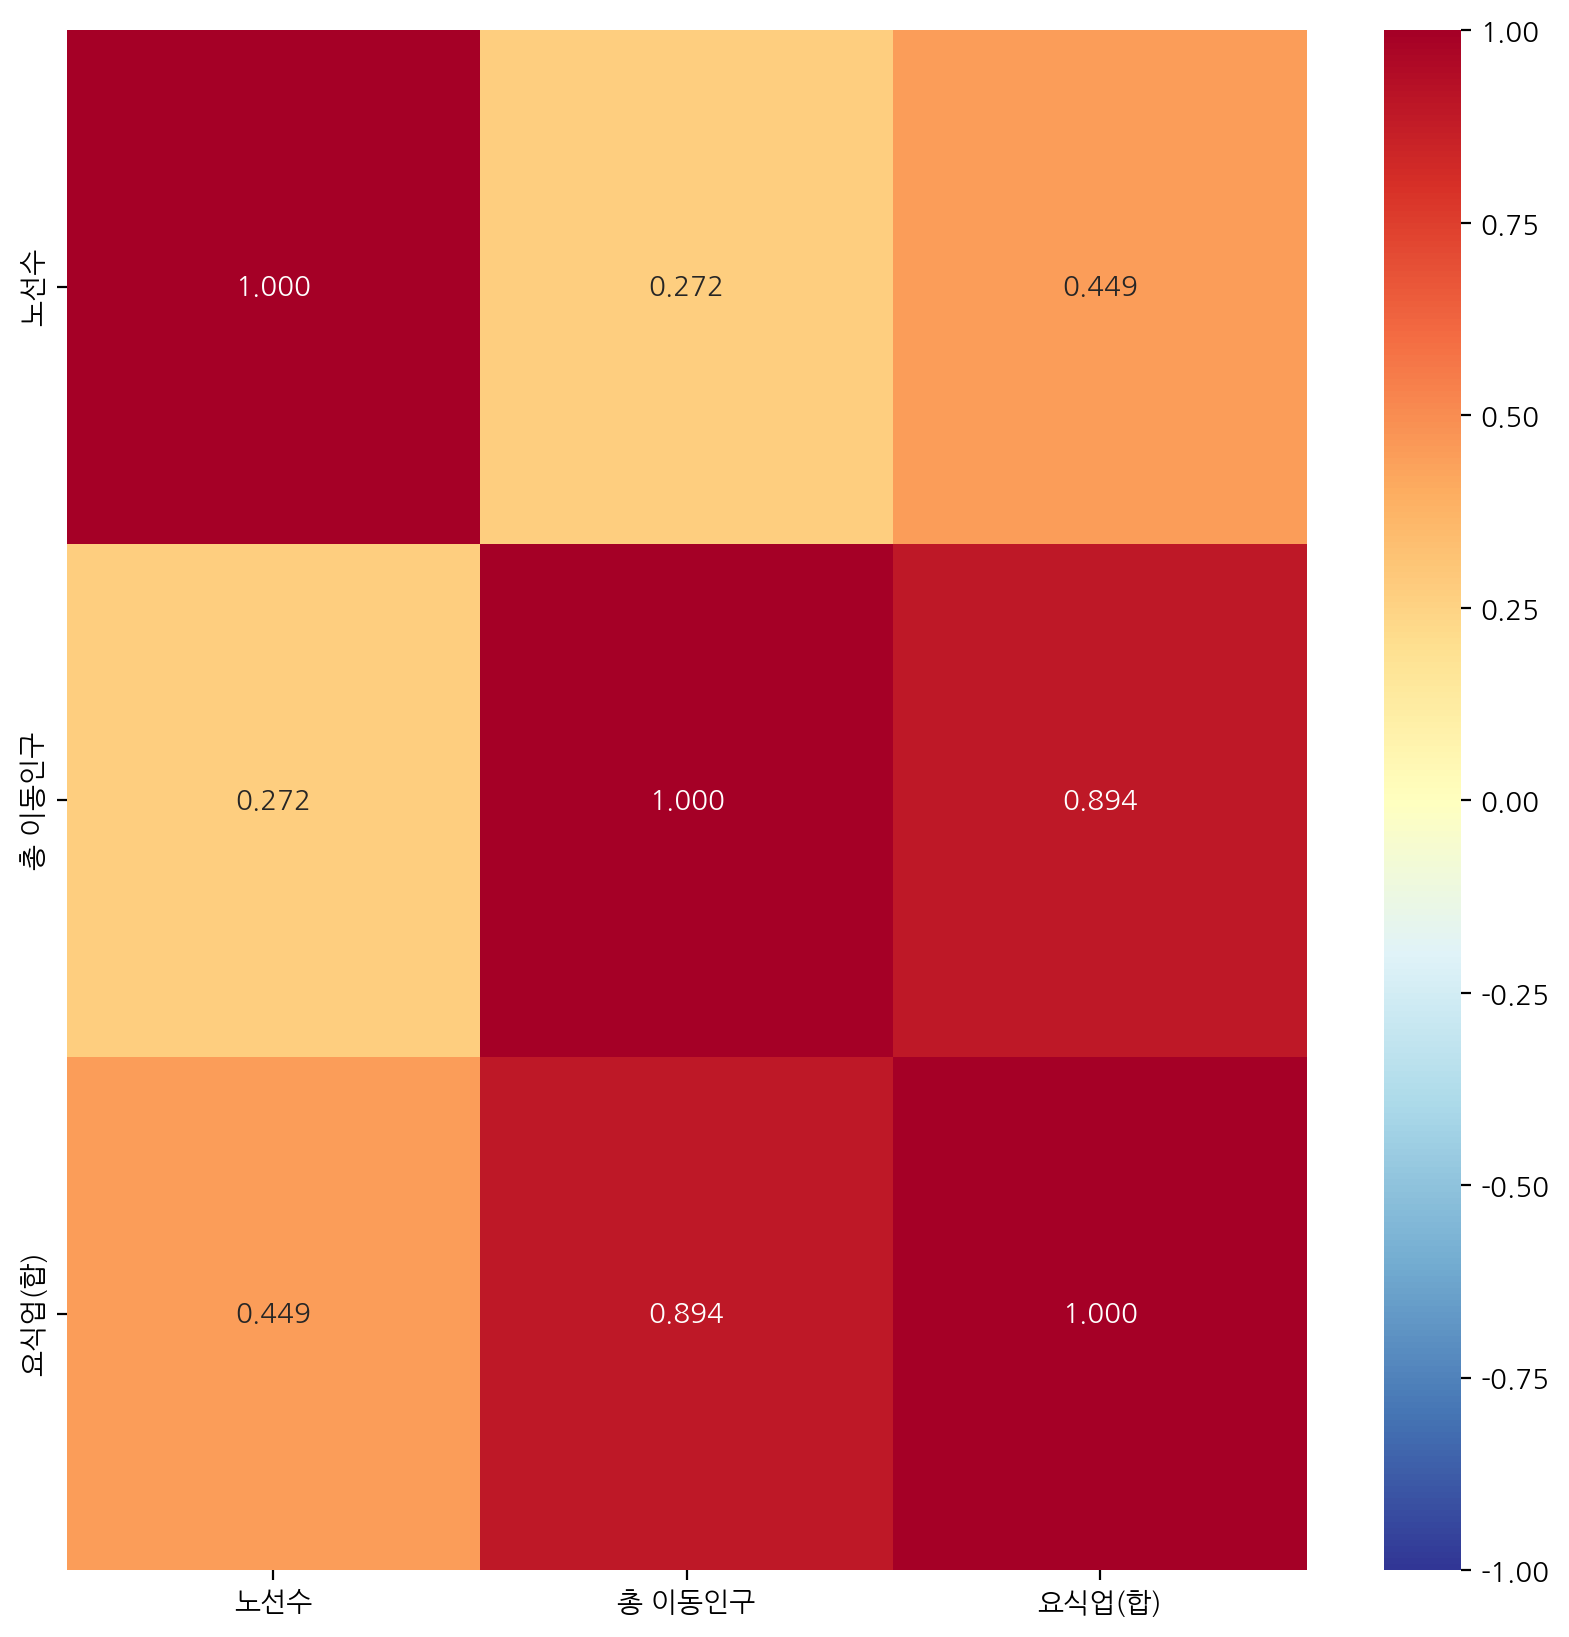

In [323]:
# 상관계수를 HeatMap으로 시각화
plt.figure(figsize=(10,10))

sns.heatmap(bis2.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()

### 3)

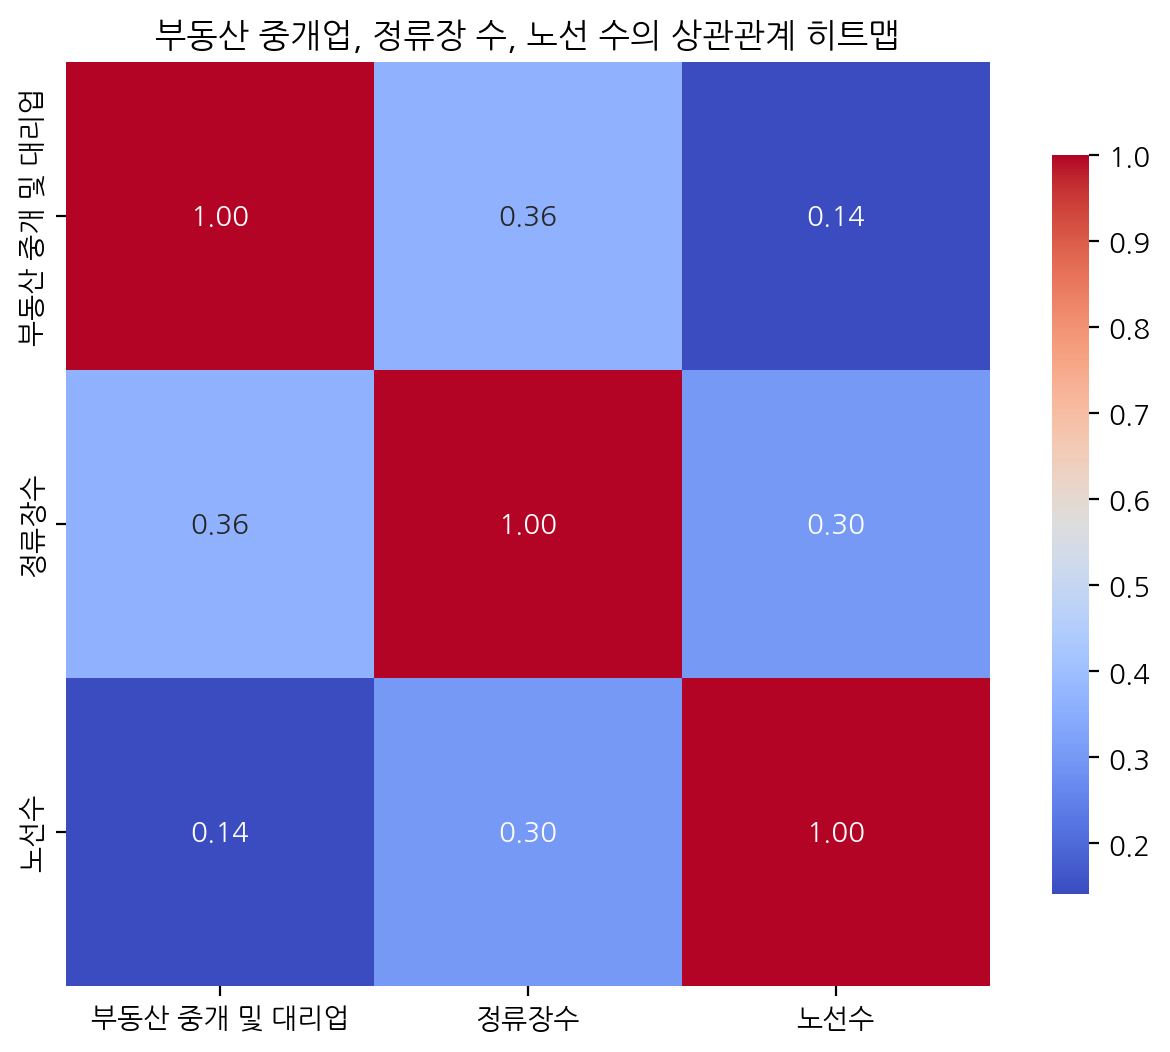

In [332]:
# 상관계수를 HeatMap으로 시각화
correlation_matrix = df[['부동산 중개 및 대리업', '정류장수', '노선수']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('부동산 중개업, 정류장 수, 노선 수의 상관관계 히트맵')
plt.show()

# 6. 관계 정리

### 1) 강한 관계의 열

요식업, 이동인구수

### 2) 중간 관계의 열

평균 승객수

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 

인구 수와 승하차 총 승객수는 양의 상관관계를 갖는데 승하차 평균승객수는 음의 상관관계를 가지므로, 인구수가 많은 곳은 대중교통이 운영되어 총 승객수는 많지만 평균승객수를 낮춘 것이다. 
따라서 인구수가 많은 곳에 평균 승객수가 많다면 더 많은 대중교통 운영이 필요하다.

### 2) 

요식업과 이동인구수가 강한 상관관계(상관지수 0.894)를 갖는것에 반해, 요식업&이동인구수와 노선수의 상관관계(0.449&0.272)가 약하므로 
요식업 분포에 비해 노선수가 적은 자치구(강동구, 송파구, 광진구, 강서구, 강남구)에 추가적인 노선이 필요 할 것이다.¶

### 3) 

 부동산 중개 및 대리업과 정류소수는 중간 상관관계(상관지수 0.350)를 갖지만, 노선수와는 약한 상관관계(상관관계 0.191)를 가져 
노선과 부동산과의 연결고리는 부족하나 부동산 업종이 많을수록 정류장 수가 많다는 상관관계 확인했다.

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

강동구, 송파구, 광진구, 강서구, 강남구에 추가적인 노선이 필요 할 것이다.




### 결론2: 그 이유는 무엇인가요?


 요식업&이동인구수와 노선수의 상관관계(0.449&0.272)가 약하므로 요식업 분포에 비해 노선수가 적은 자치구에 추가적인 노선이 필요 할 것이기 때문이다.
